In [1004]:
# author : Khirabdhi Tanaya

In [1005]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import math
from functools import reduce
import seaborn as sns

# Data Preprocessing

## Importing Raw Data

In [1006]:
root_filepath = '/Untitled Folder'


In [1007]:
data_files = os.listdir(root_filepath)

# creating a dict to store dataframe name as key and data as value
dfs = {}

for file in data_files:
    filename = root_filepath + "/" + str(file)
    print(filename)
    # reading files
    df = pd.read_sas(filename, format='xport')
    # filling the data dict
    dfs[file] = df

/Untitled Folder/P_DPQ.XPT
/Untitled Folder/P_DIQ.XPT
/Untitled Folder/P_PAQ.XPT
/Untitled Folder/P_DEMO.XPT
/Untitled Folder/P_SLQ.XPT
/Untitled Folder/P_BMX.XPT
/Untitled Folder/P_SMQ.xpt


In [1008]:
dfs.keys()

dict_keys(['P_DPQ.XPT', 'P_DIQ.XPT', 'P_PAQ.XPT', 'P_DEMO.XPT', 'P_SLQ.XPT', 'P_BMX.XPT', 'P_SMQ.xpt'])

## Demographic Variables and Sample Weights Dataset (P_DEMO)

In [1009]:
dfs['P_DEMO.XPT'].head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA,INDFMPIR
0,109263.0,66.0,2.0,1.0,2.0,NaN,5.0,6.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,7891.762435,8.951816e+03,3.0,156.0,4.66
1,109264.0,66.0,2.0,2.0,13.0,NaN,1.0,1.0,2.0,1.0,...,2.0,1.0,2.0,2.0,1.0,11689.747264,1.227116e+04,1.0,155.0,0.83
2,109265.0,66.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,1.0,...,2.0,NaN,NaN,NaN,NaN,16273.825939,1.665876e+04,1.0,157.0,3.06
3,109266.0,66.0,2.0,2.0,29.0,NaN,5.0,6.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,7825.646112,8.154968e+03,2.0,168.0,5.00
4,109267.0,66.0,1.0,2.0,21.0,NaN,2.0,2.0,NaN,2.0,...,2.0,NaN,NaN,NaN,NaN,26379.991724,5.397605e-79,1.0,156.0,5.00


In [1010]:
dfs['P_DEMO.XPT'].shape

(15560, 29)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **RIAGENDR** - Gender
  - 1 :	Male
  - 2 :	Female
  - . :	Missing

3. **RIDAGEYR** - Age in years at screening
  - 0 to 79 : Range of values
  - 80 : 80 years and over
  - . : Missing

4. **RIDRETH3** - Race and Hispanic origin information, with Non-Hispanic Asian
  - 1 :	Mexican American
  - 2 :	Other Hispanic
  - 3 :	Non-Hispanic White
  - 4 :	Non-Hispanic Black
  - 6 : Non-Hispanic Asian
  - 7 :	Other Race - Including Multi-Racial
  - .	: Missing

4. **DMDBORN4** - Country of birth
  - 1 :	Born in 50 US states or Washington, DC
  - 2 :	Other
  - 77 : Refused
  - 99 : Don't Know
  - .	: Missing

5. **DMDEDUC2** - Highest Education level
  
  Target : Both males and females (20 years - 150 years)
  - 1 :	Less than 9th grade
  - 2 :	9-11th grade (Includes 12th grade with no diploma)
  - 3 :	High school graduate/GED or equivalent
  - 4 :	Some college or AA degree
  - 5 : College graduate or above
  - 7 : Refused
  - 9 :	Don't Know
  -	 . : Missing

6. **INDFMPIR** - Ratio of family income to poverty
  - 0 to 4.98 :	Range of Values
  - 5 :	Value greater than or equal to 5.00
  - . : Missing



In [1011]:
#Dropping irrelavent columns
dfs['P_DEMO.XPT']=dfs['P_DEMO.XPT'][["SEQN", "RIAGENDR", "RIDAGEYR", "RIDRETH3","DMDBORN4", "DMDEDUC2","INDFMPIR"]]

In [1012]:
dfs['P_DEMO.XPT'].shape

(15560, 7)

In [1013]:
# Checking for null values
missing_df=round((dfs['P_DEMO.XPT'].isna().sum() *100) , 2) / dfs['P_DEMO.XPT'].shape[0]
missing_df = missing_df.reset_index()
missing_df.columns = ['Column Name', 'Percentage of Missing Values']
missing_df

,Column Name,Percentage of Missing Values
0,SEQN,0.000000
1,RIAGENDR,0.000000
2,RIDAGEYR,0.000000
3,RIDRETH3,0.000000
4,DMDBORN4,0.000000
5,DMDEDUC2,40.668380
6,INDFMPIR,14.145244


In [1014]:
dfs['P_DEMO.XPT'].describe()

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR
count,15560.00000,15560.000000,1.556000e+04,15560.000000,15560.000000,9232.000000,1.335900e+04
mean,117042.50000,1.503792,3.374248e+01,3.486118,1.230206,3.551993,2.405937e+00
std,4491.92943,0.500002,2.532053e+01,1.622734,1.728083,1.214109,1.634346e+00
min,109263.00000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,5.397605e-79
25%,113152.75000,1.000000,1.000000e+01,3.000000,1.000000,3.000000,1.020000e+00
50%,117042.50000,2.000000,3.000000e+01,3.000000,1.000000,4.000000,1.960000e+00
75%,120932.25000,2.000000,5.600000e+01,4.000000,1.000000,4.000000,3.880000e+00
max,124822.00000,2.000000,8.000000e+01,7.000000,99.000000,9.000000,5.000000e+00


## Body Measures Dataset (P_BMX)

In [1015]:
dfs['P_BMX.XPT'].head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,109263.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,1.0,42.2,NaN,NaN,NaN,NaN,NaN,154.7,NaN,...,36.3,NaN,33.8,NaN,22.7,NaN,63.8,NaN,85.0,NaN
2,109265.0,1.0,12.0,NaN,91.6,NaN,NaN,NaN,89.3,NaN,...,NaN,NaN,18.6,NaN,14.8,NaN,41.2,NaN,NaN,NaN
3,109266.0,1.0,97.1,NaN,NaN,NaN,NaN,NaN,160.2,NaN,...,40.8,NaN,34.7,NaN,35.8,NaN,117.9,NaN,126.1,NaN
4,109269.0,3.0,13.6,NaN,90.9,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN


In [1016]:
dfs['P_BMX.XPT'].shape

(14300, 22)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **BMXWT** - Weight (kg)
  - 3.2 to 254.3 :	Range of Values
  - . :	Missing

3. **BMXHT** - Standing Height (cm)
  
  Target : Both males and females 2 years - 150 years
  - 78.3 to 199.6 : Range of Values
  - .	: Missing

4. **BMXBMI** - Body Mass Index (kg/m**2)
  - 11.9 to 92.3 :	Range of Values
  - .	: Missing



In [1017]:
#Dropping irrelavent columns
dfs['P_BMX.XPT']=dfs['P_BMX.XPT'][["SEQN", "BMXWT","BMXHT", "BMXBMI"]]

In [1018]:
dfs['P_BMX.XPT'].shape

(14300, 4)

In [1019]:
dfs['P_BMX.XPT'].head()

,SEQN,BMXWT,BMXHT,BMXBMI
0,109263.0,NaN,NaN,NaN
1,109264.0,42.2,154.7,17.6
2,109265.0,12.0,89.3,15.0
3,109266.0,97.1,160.2,37.8
4,109269.0,13.6,NaN,NaN


##  Diabetes Dataset (P_DIQ)

In [1020]:
dfs['P_DIQ.XPT'].head()

,SEQN,DIQ010,DID040,DIQ160,DIQ180,DIQ050,DID060,DIQ060U,DIQ070,DIQ230,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,109263.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,109267.0,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1021]:
dfs['P_DIQ.XPT'].shape

(14986, 28)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **DIQ010** - Doctor told you have diabetes
  - 1 :	Yes
  - 2 :	No
  - 3 :	Borderline
  - 7 :	Refused
  - 9 :	Don't know
  - . :	Missing



In [1022]:
#Dropping irrelavent columns
dfs['P_DIQ.XPT']=dfs['P_DIQ.XPT'][["SEQN", "DIQ010"]]

In [1023]:
dfs['P_DIQ.XPT'].shape

(14986, 2)

In [1024]:
dfs['P_DIQ.XPT'].head()

,SEQN,DIQ010
0,109263.0,2.0
1,109264.0,2.0
2,109265.0,2.0
3,109266.0,2.0
4,109267.0,2.0


## Physical Activity Dataset (P_PAQ)


In [1025]:
dfs['P_PAQ.XPT'].head()

,SEQN,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,PAQ650,PAQ655,PAD660,PAQ665,PAQ670,PAD675,PAD680
0,109266.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,60.0,1.0,4.0,30.0,480.0
1,109267.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,6.0,90.0,2.0,NaN,NaN,540.0
2,109268.0,1.0,5.0,540.0,1.0,5.0,300.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,540.0
3,109271.0,2.0,NaN,NaN,1.0,2.0,120.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,60.0
4,109273.0,1.0,3.0,240.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,1.0,4.0,120.0,180.0


In [1026]:
dfs['P_PAQ.XPT'].shape

(9693, 17)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **PAQ620** - Moderate work activity
  - 1 :	Yes
  - 2 :	No
  - 7 :	Refused
  - 9 :	Don't know
  - .	: Missing

3. **PAQ665** - Moderate recreational activities
  - 1 :	Yes
  - 2 :	No
  - 7 :	Refused
  - 9 :	Don't know
  - .	: Missing


In [1027]:
#Dropping irrelavent columns
dfs['P_PAQ.XPT']=dfs['P_PAQ.XPT'][["SEQN", "PAQ620", "PAQ665"]]

In [1028]:
dfs['P_PAQ.XPT'].shape

(9693, 3)

In [1029]:
dfs['P_PAQ.XPT'].head()

,SEQN,PAQ620,PAQ665
0,109266.0,2.0,1.0
1,109267.0,2.0,2.0
2,109268.0,1.0,2.0
3,109271.0,1.0,2.0
4,109273.0,2.0,1.0


## Mental Health - Depression Screener Dataset (P_DPQ)


In [1030]:
dfs['P_DPQ.XPT'].head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,109266.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
1,109271.0,2.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,2.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79
2,109273.0,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,5.397605e-79,5.397605e-79
3,109274.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
4,109282.0,5.397605e-79,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,3.000000e+00,5.397605e-79,5.397605e-79


In [1031]:
dfs['P_DPQ.XPT'].shape

(8965, 11)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **DPQ020** - Feeling down, depressed, or hopeless
  - 0 :	Not at all
  - 1 :	Several days
  - 2 :	More than half the days
  - 3 :	Nearly every day
  - 7 : Refused
  - 9 : Don't know
  - .	: Missing

3. **DPQ050** - Poor appetite or overeating
  - 0 :	Not at all
  - 1 :	Several days
  - 2 :	More than half the days
  - 3 :	Nearly every day
  - 7 : Refused
  - 9 : Don't know
  - .	: Missing


In [1032]:
#Dropping irrelavent columns
dfs['P_DPQ.XPT']=dfs['P_DPQ.XPT'][["SEQN", "DPQ020", "DPQ050"]]

Fixing Corrupt Values

In [1033]:
dfs['P_DPQ.XPT'].head()

,SEQN,DPQ020,DPQ050
0,109266.0,5.397605e-79,5.397605e-79
1,109271.0,1.000000e+00,5.397605e-79
2,109273.0,2.000000e+00,2.000000e+00
3,109274.0,5.397605e-79,5.397605e-79
4,109282.0,1.000000e+00,5.397605e-79


In [1034]:
dfs['P_DPQ.XPT'].dtypes

,0
SEQN,float64
DPQ020,float64
DPQ050,float64


In [1035]:
value_counts = dfs['P_DPQ.XPT'][['DPQ020', 'DPQ050']].apply(pd.Series.value_counts)
value_counts

,DPQ020,DPQ050
5.397605e-79,6187,6165
1.000000e+00,1456,1293
2.000000e+00,387,464
3.000000e+00,269,377
9.000000e+00,5,4
7.000000e+00,2,2


Upon insvestigation it was discovered that '0' was read as '5.397605346934028e-79' for this dataset.

In [1036]:
dfs['P_DPQ.XPT'].replace(5.397605346934028e-79, 0.0, inplace=True)

In [1037]:
dfs['P_DPQ.XPT'].head()

,SEQN,DPQ020,DPQ050
0,109266.0,0.0,0.0
1,109271.0,1.0,0.0
2,109273.0,2.0,2.0
3,109274.0,0.0,0.0
4,109282.0,1.0,0.0


In [1038]:
#Converting 'DPQ020' & 'DPQ050' column values to Integers
dfs['P_DPQ.XPT'][['DPQ020', 'DPQ050']]=dfs['P_DPQ.XPT'][['DPQ020', 'DPQ050']].astype(pd.Int64Dtype())

In [1039]:
dfs['P_DPQ.XPT'].head()

,SEQN,DPQ020,DPQ050
0,109266.0,0,0
1,109271.0,1,0
2,109273.0,2,2
3,109274.0,0,0
4,109282.0,1,0


## Sleep Disorders Dataset (P_SLQ)


In [1040]:
dfs['P_SLQ.XPT'].head()

,SEQN,SLQ300,SLQ310,SLD012,SLQ320,SLQ330,SLD013,SLQ030,SLQ040,SLQ050,SLQ120
0,109266.0,b'22:00',b'05:30',7.5,b'23:00',b'07:00',8.0,1.000000e+00,5.397605e-79,2.0,5.397605e-79
1,109267.0,b'00:00',b'08:00',8.0,b'03:00',b'11:00',8.0,5.397605e-79,5.397605e-79,2.0,2.000000e+00
2,109268.0,b'22:00',b'06:30',8.5,b'23:00',b'07:00',8.0,5.397605e-79,5.397605e-79,2.0,1.000000e+00
3,109271.0,b'23:00',b'09:00',10.0,b'23:00',b'12:00',13.0,5.397605e-79,5.397605e-79,1.0,3.000000e+00
4,109273.0,b'08:00',b'14:35',6.5,b'21:00',b'05:00',8.0,5.397605e-79,5.397605e-79,1.0,2.000000e+00


In [1041]:
dfs['P_SLQ.XPT'].shape

(10195, 11)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **SLD012** - Sleep hours - Weekdays or Workdays
  - 3 to 13.5 :	Range of Values
  - 2 :	Less then 3 hours
  - 14 : 14 hours or more
  - .	: Missing

3. **SLD013** - Sleep hours - Weekend
  - 3 to 13.5 :	Range of Values
  - 2 :	Less then 3 hours
  - 14 : 14 hours or more
  - .	: Missing


In [1042]:
#Dropping irrelavent columns
dfs['P_SLQ.XPT']=dfs['P_SLQ.XPT'][["SEQN", "SLD012", "SLD013"]]

In [1043]:
dfs['P_SLQ.XPT'].shape

(10195, 3)

In [1044]:
dfs['P_SLQ.XPT'].head()

,SEQN,SLD012,SLD013
0,109266.0,7.5,8.0
1,109267.0,8.0,8.0
2,109268.0,8.5,8.0
3,109271.0,10.0,13.0
4,109273.0,6.5,8.0


## Smoking Dataset (P_SMQ)


In [1045]:
dfs['P_SMQ.xpt'].head()

,SEQN,SMQ020,SMD030,SMQ040,SMQ050Q,SMQ050U,SMD057,SMQ078,SMD641,SMD650,SMD100FL,SMD100MN,SMQ670,SMQ621,SMD630,SMAQUEX2
0,109264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
1,109266.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,109267.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,109268.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,109271.0,1.0,18.0,1.0,NaN,NaN,NaN,2.0,30.0,20.0,NaN,NaN,1.0,NaN,NaN,1.0


In [1046]:
dfs['P_SMQ.xpt'].shape

(11137, 16)

**Descriptions for each of the columns in the dataset relevant for our analysis:**

1. **SEQN** - Respondent sequence number

2. **SMQ040** - Do you now smoke cigarettes?
  - 1 :	Every day
  - 2 :	Some days
  - 3 :	Not at all
  - 7 : Refused
  - 9 : Don't know
  - .	: Missing



In [1047]:
#Dropping irrelavent columns
dfs['P_SMQ.xpt']=dfs['P_SMQ.xpt'][["SEQN", "SMQ040"]]

In [1048]:
dfs['P_SMQ.xpt'].shape

(11137, 2)

In [1049]:
dfs['P_SMQ.xpt'].head()

,SEQN,SMQ040
0,109264.0,NaN
1,109266.0,NaN
2,109267.0,NaN
3,109268.0,NaN
4,109271.0,1.0


## Creating Master Dataset

Merging Datasets

In [1050]:
dfslist = list(dfs.values())
merged_df = reduce(lambda left, right: pd.merge(left, right, on='SEQN', how='outer'), dfslist)
merged_df.head()

,SEQN,DPQ020,DPQ050,DIQ010,PAQ620,PAQ665,RIAGENDR,RIDAGEYR,RIDRETH3,DMDBORN4,DMDEDUC2,INDFMPIR,SLD012,SLD013,BMXWT,BMXHT,BMXBMI,SMQ040
0,109263.0,<NA>,<NA>,2.0,NaN,NaN,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,<NA>,<NA>,2.0,NaN,NaN,2.0,13.0,1.0,1.0,NaN,0.83,NaN,NaN,42.2,154.7,17.6,NaN
2,109265.0,<NA>,<NA>,2.0,NaN,NaN,1.0,2.0,3.0,1.0,NaN,3.06,NaN,NaN,12.0,89.3,15.0,NaN
3,109266.0,0,0,2.0,2.0,1.0,2.0,29.0,6.0,2.0,5.0,5.00,7.5,8.0,97.1,160.2,37.8,NaN
4,109267.0,<NA>,<NA>,2.0,2.0,2.0,2.0,21.0,2.0,2.0,4.0,5.00,8.0,8.0,NaN,NaN,NaN,NaN


In [1051]:
merged_df.shape

(15560, 18)

Renaming Columns

In [1052]:
df_tidy = merged_df.rename(columns = {'RIAGENDR':'Gender','RIDAGEYR':'Age','RIDRETH3':'Race',
                               'DMDBORN4':'CountryofBirth','DMDEDUC2':'Education',
                               'INDFMPIR':'FamilyIncomeRatio', 'BMXWT':'Weight','BMXHT':'Height',
                               'BMXBMI':'BMI','DIQ010':'Diabetes', 'PAQ620':'ModerateWorkActivity','PAQ665':'ModerateRecreationalActivities',
                               'DPQ020':'Depressed', 'DPQ050':'PoorAppetite_or_Overeating',
                               'SLD012':'SleepHoursWeekdays', 'SLD013':'SleepHoursWeekend', 'SMQ040':'Smoking'}, inplace = False)


In [1053]:
df_tidy.head()

,SEQN,Depressed,PoorAppetite_or_Overeating,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Gender,Age,Race,CountryofBirth,Education,FamilyIncomeRatio,SleepHoursWeekdays,SleepHoursWeekend,Weight,Height,BMI,Smoking
0,109263.0,<NA>,<NA>,2.0,NaN,NaN,1.0,2.0,6.0,1.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,<NA>,<NA>,2.0,NaN,NaN,2.0,13.0,1.0,1.0,NaN,0.83,NaN,NaN,42.2,154.7,17.6,NaN
2,109265.0,<NA>,<NA>,2.0,NaN,NaN,1.0,2.0,3.0,1.0,NaN,3.06,NaN,NaN,12.0,89.3,15.0,NaN
3,109266.0,0,0,2.0,2.0,1.0,2.0,29.0,6.0,2.0,5.0,5.00,7.5,8.0,97.1,160.2,37.8,NaN
4,109267.0,<NA>,<NA>,2.0,2.0,2.0,2.0,21.0,2.0,2.0,4.0,5.00,8.0,8.0,NaN,NaN,NaN,NaN


Dropping Null values based on BMI column

In [1054]:
df_tidy.dropna(subset=['BMI'], inplace = True)
df_tidy.shape

(13137, 18)

In [1055]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13137 entries, 1 to 15559
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            13137 non-null  float64
 1   Depressed                       8203 non-null   Int64  
 2   PoorAppetite_or_Overeating      8202 non-null   Int64  
 3   Diabetes                        13137 non-null  float64
 4   ModerateWorkActivity            8790 non-null   float64
 5   ModerateRecreationalActivities  8790 non-null   float64
 6   Gender                          13137 non-null  float64
 7   Age                             13137 non-null  float64
 8   Race                            13137 non-null  float64
 9   CountryofBirth                  13137 non-null  float64
 10  Education                       8381 non-null   float64
 11  FamilyIncomeRatio               11443 non-null  float64
 12  SleepHoursWeekdays              9188 

In [1056]:
df_tidy = df_tidy.astype({
    'SEQN':'int', 'Gender':'int', 'Age':'int', 'Race':'int', 'CountryofBirth':'int',
     'Education' : 'Int64','ModerateWorkActivity' : 'Int64','ModerateRecreationalActivities' : 'Int64',
    'Diabetes':'Int64','Smoking' : 'Int64'
    })


In [1057]:
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13137 entries, 1 to 15559
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            13137 non-null  int64  
 1   Depressed                       8203 non-null   Int64  
 2   PoorAppetite_or_Overeating      8202 non-null   Int64  
 3   Diabetes                        13137 non-null  Int64  
 4   ModerateWorkActivity            8790 non-null   Int64  
 5   ModerateRecreationalActivities  8790 non-null   Int64  
 6   Gender                          13137 non-null  int64  
 7   Age                             13137 non-null  int64  
 8   Race                            13137 non-null  int64  
 9   CountryofBirth                  13137 non-null  int64  
 10  Education                       8381 non-null   Int64  
 11  FamilyIncomeRatio               11443 non-null  float64
 12  SleepHoursWeekdays              9188 

Since my analysis is focused on adults, I will extract respondents in the age group of 20–65 years.

In [1058]:
df_tidy = df_tidy[(df_tidy['Age'] >= 20) & (df_tidy['Age'] <= 65)]
df_tidy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6424 entries, 3 to 15558
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SEQN                            6424 non-null   int64  
 1   Depressed                       6032 non-null   Int64  
 2   PoorAppetite_or_Overeating      6031 non-null   Int64  
 3   Diabetes                        6424 non-null   Int64  
 4   ModerateWorkActivity            6424 non-null   Int64  
 5   ModerateRecreationalActivities  6424 non-null   Int64  
 6   Gender                          6424 non-null   int64  
 7   Age                             6424 non-null   int64  
 8   Race                            6424 non-null   int64  
 9   CountryofBirth                  6424 non-null   int64  
 10  Education                       6424 non-null   Int64  
 11  FamilyIncomeRatio               5543 non-null   float64
 12  SleepHoursWeekdays              6379 n

# Data Visualization


##Univariate Analysis

Column Charts for Categorical Variables


<ipython-input-1059-783068533d2a>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


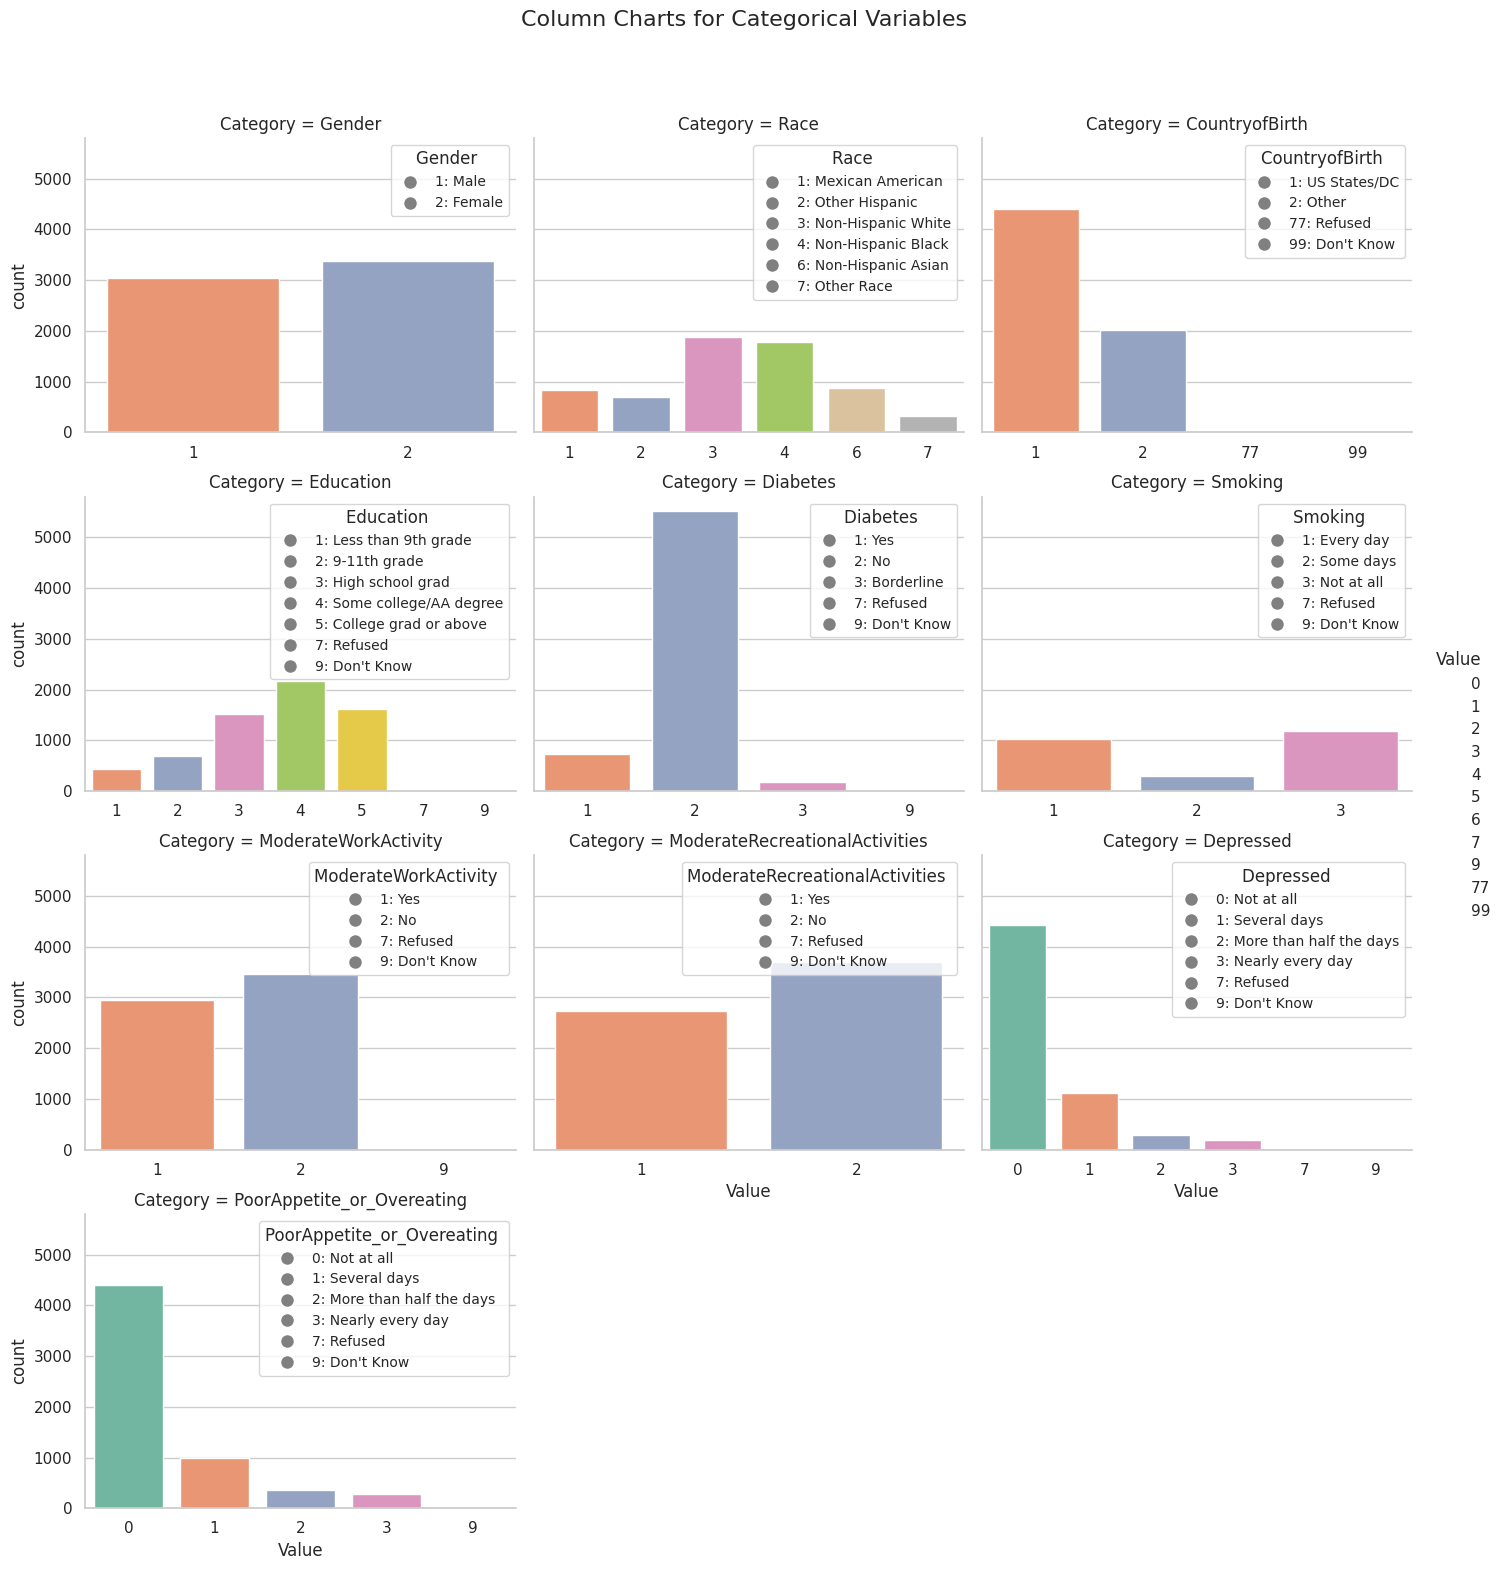

In [1059]:
# List of categorical columns to plot
categorical_columns = [
    'Gender', 'Race', 'CountryofBirth', 'Education', 'Diabetes', 'Smoking',
    'ModerateWorkActivity', 'ModerateRecreationalActivities',
    'Depressed', 'PoorAppetite_or_Overeating'
]

# Legend for each subplot
category_explanations = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Race': {
        1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White',
        4: 'Non-Hispanic Black', 6: 'Non-Hispanic Asian', 7: 'Other Race'
    },
    'CountryofBirth': {
        1: 'US States/DC', 2: 'Other', 77: 'Refused', 99: 'Don\'t Know'
    },
    'Education': {
        1: 'Less than 9th grade', 2: '9-11th grade',
        3: 'High school grad', 4: 'Some college/AA degree',
        5: 'College grad or above', 7: 'Refused', 9: 'Don\'t Know'
    },
    'Diabetes': {
        1: 'Yes', 2: 'No', 3: 'Borderline', 7: 'Refused', 9: 'Don\'t Know'
    },
    'Smoking': {
        1: 'Every day', 2: 'Some days', 3: 'Not at all', 7: 'Refused', 9: 'Don\'t Know'
    },
    'ModerateWorkActivity': {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don\'t Know'},
    'ModerateRecreationalActivities': {1: 'Yes', 2: 'No', 7: 'Refused', 9: 'Don\'t Know'},
    'Depressed': {
        0: 'Not at all', 1: 'Several days', 2: 'More than half the days',
        3: 'Nearly every day', 7: 'Refused', 9: 'Don\'t Know'
    },
    'PoorAppetite_or_Overeating': {
        0: 'Not at all', 1: 'Several days', 2: 'More than half the days',
        3: 'Nearly every day', 7: 'Refused', 9: 'Don\'t Know'
    }
}

# Melting the DataFrame to long format for easier plotting
df_melted = df_tidy[categorical_columns].melt(var_name='Category', value_name='Value')

# Catplot for each categorical variable
g = sns.catplot(
    data=df_melted,
    x='Value',
    col='Category',
    kind='count',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharex=False,
    palette='Set2'
)

# Adding unique legends for each subplot
for ax, col in zip(g.axes.flat, categorical_columns):
    explanations = category_explanations.get(col, {})
    # Creating custom legend entries
    handles = [plt.Line2D([0], [0], marker='o', color='w',
                          markerfacecolor='gray', markersize=10) for _ in explanations]
    labels = [f'{key}: {value}' for key, value in explanations.items()]
    # Adding legend to each subplot
    ax.legend(handles, labels, title=f'{col} ', loc='upper right', fontsize='small')

# Adjusting the layout for better readability
plt.subplots_adjust(top=0.9)
plt.suptitle('Column Charts for Categorical Variables', fontsize=16)
plt.show()

Histogram for Continuous Variables

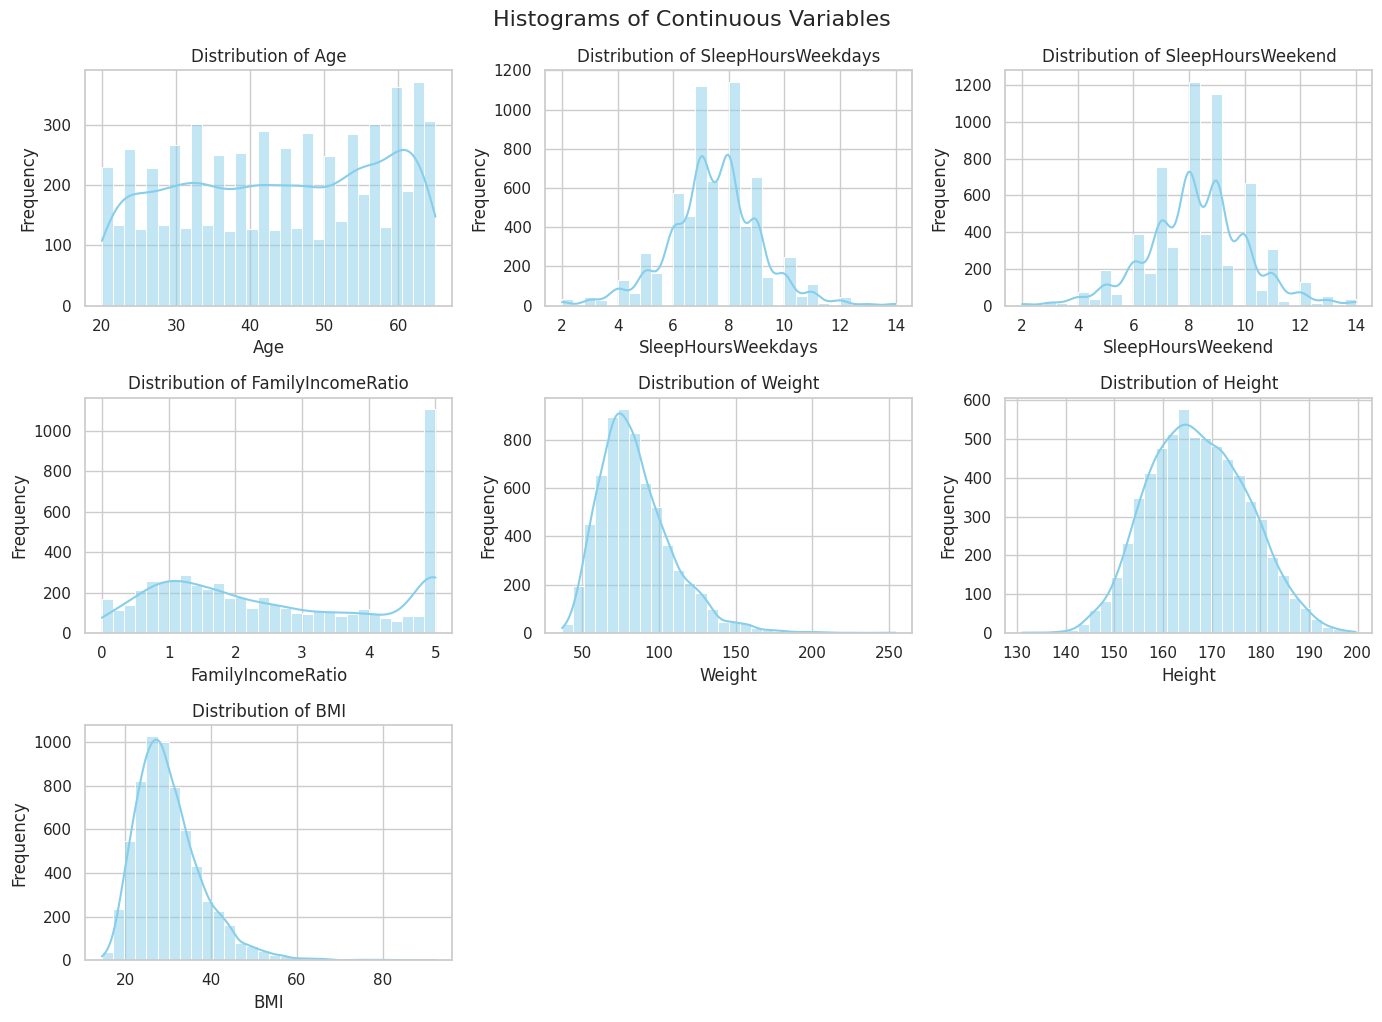

In [1060]:
continuous_columns = ['Age', 'SleepHoursWeekdays', 'SleepHoursWeekend', 'FamilyIncomeRatio', 'Weight', 'Height', 'BMI']
plt.figure(figsize=(14, 10))
for idx, column in enumerate(continuous_columns, 1):
    plt.subplot(3, 3, idx)  # Creating a 3x3 grid of subplots
    sns.histplot(data=df_tidy, x=column, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)

# Adjusting layout to avoid overlapping
plt.tight_layout()
plt.suptitle('Histograms of Continuous Variables', fontsize=16, y=1.02)
plt.show()

## Bivariate Analysis

Scatterplots


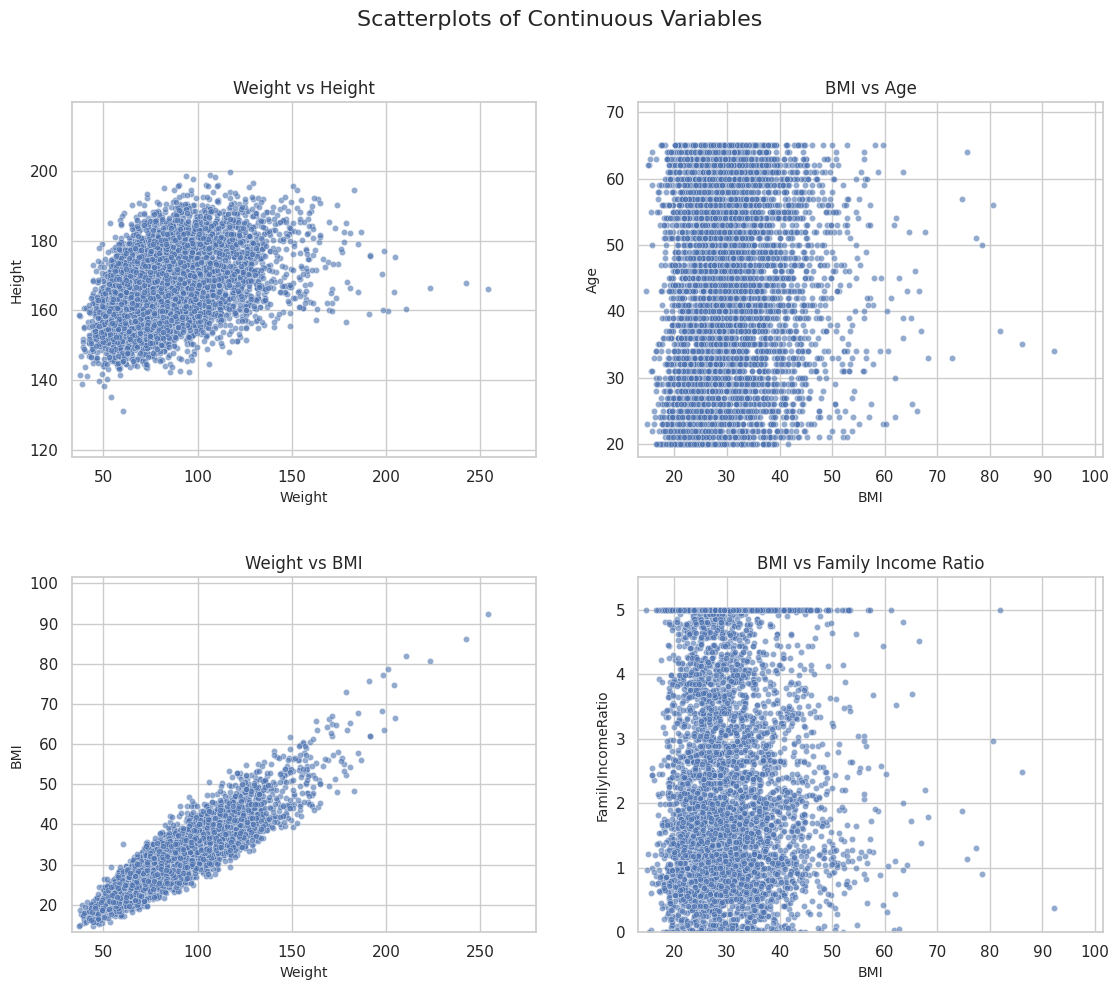

In [1061]:
sns.set(style='whitegrid')

# List of scatter plot pairs
scatter_pairs = [
    ('Weight', 'Height', 'Weight vs Height'),
    ('BMI', 'Age', 'BMI vs Age'),
    ('Weight', 'BMI', 'Weight vs BMI'),
    ('BMI', 'FamilyIncomeRatio', 'BMI vs Family Income Ratio')
]

# Determining grid size
n_cols = 2
n_rows = (len(scatter_pairs) + 1) // n_cols

# Creating a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 10))
axes = axes.flatten()

for i, (x_col, y_col, title) in enumerate(scatter_pairs):
    sns.scatterplot(data=df_tidy, x=x_col, y=y_col, alpha=0.6, s=20, edgecolor='w', ax=axes[i])

    # Setting axis limits to reduce clustering effect
    axes[i].set_ylim(df_tidy[y_col].min() * 0.9, df_tidy[y_col].max() * 1.1)
    axes[i].set_xlim(df_tidy[x_col].min() * 0.9, df_tidy[x_col].max() * 1.1)

    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlabel(x_col, fontsize=10)
    axes[i].set_ylabel(y_col, fontsize=10)
    axes[i].grid(True)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)  # Increasing padding for clarity
plt.suptitle('Scatterplots of Continuous Variables', fontsize=16, y=1.02)
plt.show()

Boxplots

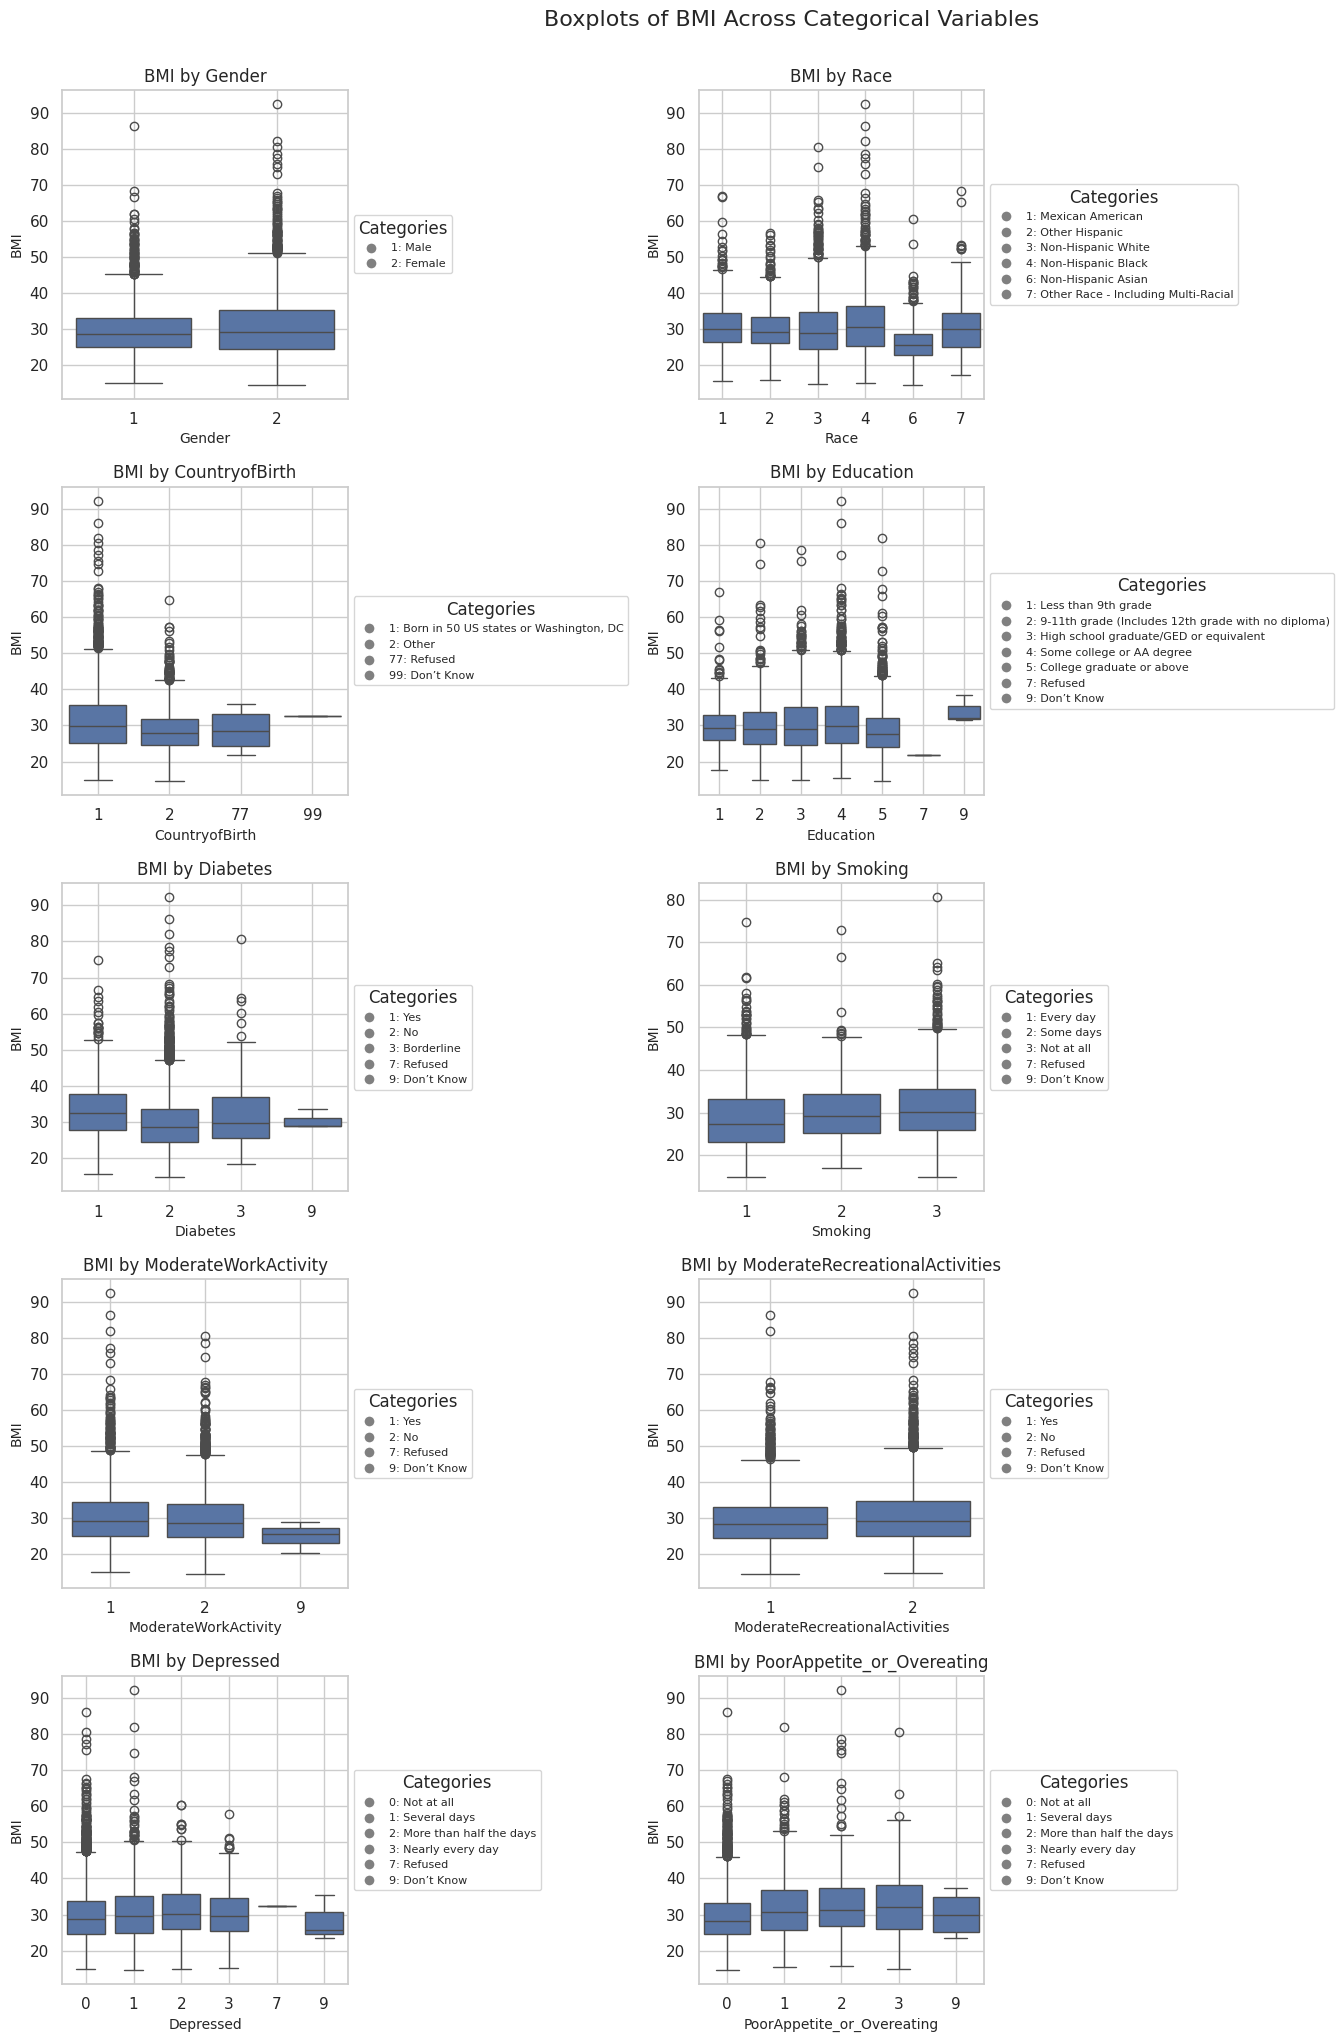

In [1062]:
# List of categorical variables and their descriptions
categorical_vars = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Race': {
        1: 'Mexican American',
        2: 'Other Hispanic',
        3: 'Non-Hispanic White',
        4: 'Non-Hispanic Black',
        6: 'Non-Hispanic Asian',
        7: 'Other Race - Including Multi-Racial'
    },
    'CountryofBirth': {
        1: 'Born in 50 US states or Washington, DC',
        2: 'Other',
        77: 'Refused',
        99: 'Don’t Know'
    },
    'Education': {
        1: 'Less than 9th grade',
        2: '9-11th grade (Includes 12th grade with no diploma)',
        3: 'High school graduate/GED or equivalent',
        4: 'Some college or AA degree',
        5: 'College graduate or above',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Diabetes': {
        1: 'Yes',
        2: 'No',
        3: 'Borderline',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Smoking': {
        1: 'Every day',
        2: 'Some days',
        3: 'Not at all',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateWorkActivity': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateRecreationalActivities': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Depressed': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'PoorAppetite_or_Overeating': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    }
}

# Set up the plotting area
n_cols = 2
n_rows = (len(categorical_vars) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))
axes = axes.flatten()

# Generate boxplots
for i, (var, legend_info) in enumerate(categorical_vars.items()):
    sns.boxplot(data=df_tidy, x=var, y='BMI', ax=axes[i])
    axes[i].set_title(f'BMI by {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('BMI', fontsize=10)
    axes[i].grid(True)

    # Add a legend outside the plot
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markersize=8, markerfacecolor='grey')
               for k, v in legend_info.items()]
    axes[i].legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title='Categories')

# Adjust layout to fit legends
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legends on the right
plt.suptitle('Boxplots of BMI Across Categorical Variables', fontsize=16, y=1.02)
plt.show()


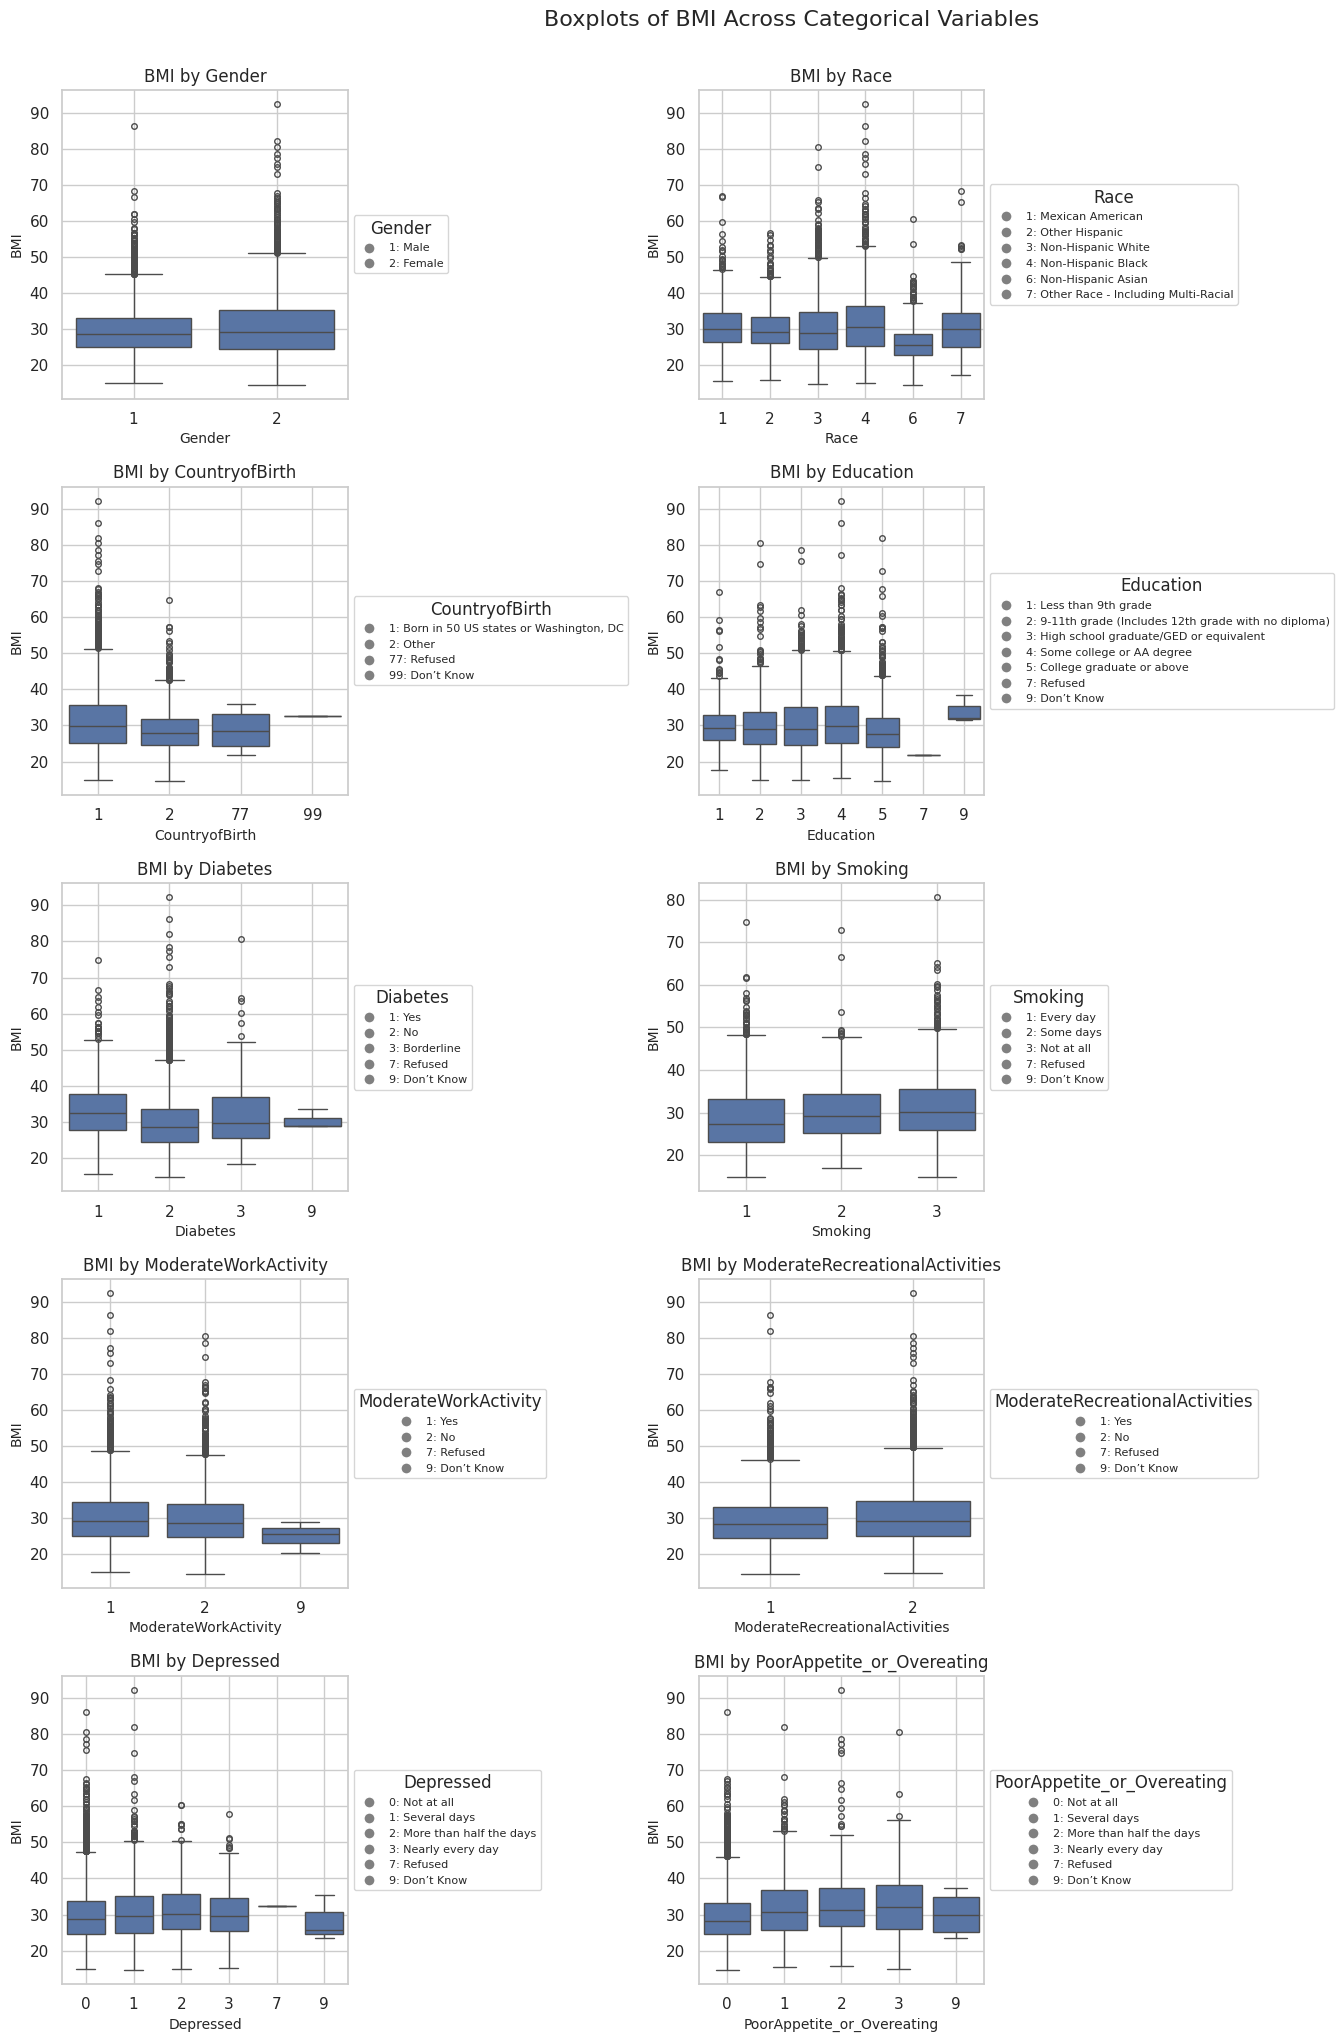

In [1063]:
# List of categorical variables and their descriptions
categorical_vars = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Race': {
        1: 'Mexican American',
        2: 'Other Hispanic',
        3: 'Non-Hispanic White',
        4: 'Non-Hispanic Black',
        6: 'Non-Hispanic Asian',
        7: 'Other Race - Including Multi-Racial'
    },
    'CountryofBirth': {
        1: 'Born in 50 US states or Washington, DC',
        2: 'Other',
        77: 'Refused',
        99: 'Don’t Know'
    },
    'Education': {
        1: 'Less than 9th grade',
        2: '9-11th grade (Includes 12th grade with no diploma)',
        3: 'High school graduate/GED or equivalent',
        4: 'Some college or AA degree',
        5: 'College graduate or above',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Diabetes': {
        1: 'Yes',
        2: 'No',
        3: 'Borderline',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Smoking': {
        1: 'Every day',
        2: 'Some days',
        3: 'Not at all',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateWorkActivity': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateRecreationalActivities': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Depressed': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'PoorAppetite_or_Overeating': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    }
}

# Set up the plotting area
n_cols = 2
n_rows = (len(categorical_vars) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))
axes = axes.flatten()

# Generate boxplots
for i, (var, legend_info) in enumerate(categorical_vars.items()):
    sns.boxplot(data=df_tidy, x=var, y='BMI', ax=axes[i], fliersize=4)
    axes[i].set_title(f'BMI by {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('BMI', fontsize=10)
    axes[i].grid(True)

    # Add a legend outside the plot with category names as legend titles
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markersize=8, markerfacecolor='grey')
               for k, v in legend_info.items()]
    axes[i].legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title=var)

# Adjust layout to fit legends
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legends on the right
plt.suptitle('Boxplots of BMI Across Categorical Variables', fontsize=16, y=1.02)
plt.show()


Violin Plots

<ipython-input-1064-6760db9ad72f>:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df_tidy, x=var, y='BMI', ax=axes[i], inner="point", scale="count")  # Inner="point" displays points
<ipython-input-1064-6760db9ad72f>:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df_tidy, x=var, y='BMI', ax=axes[i], inner="point", scale="count")  # Inner="point" displays points
<ipython-input-1064-6760db9ad72f>:82: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(data=df_tidy, x=var, y='BMI', ax=axes[i], inner="point", scale="count")  # Inner="point" displays points
<ipython-input-1064-6760db9ad72f>:82: FutureWarning: 

The `scale` parameter has been renamed and will be rem

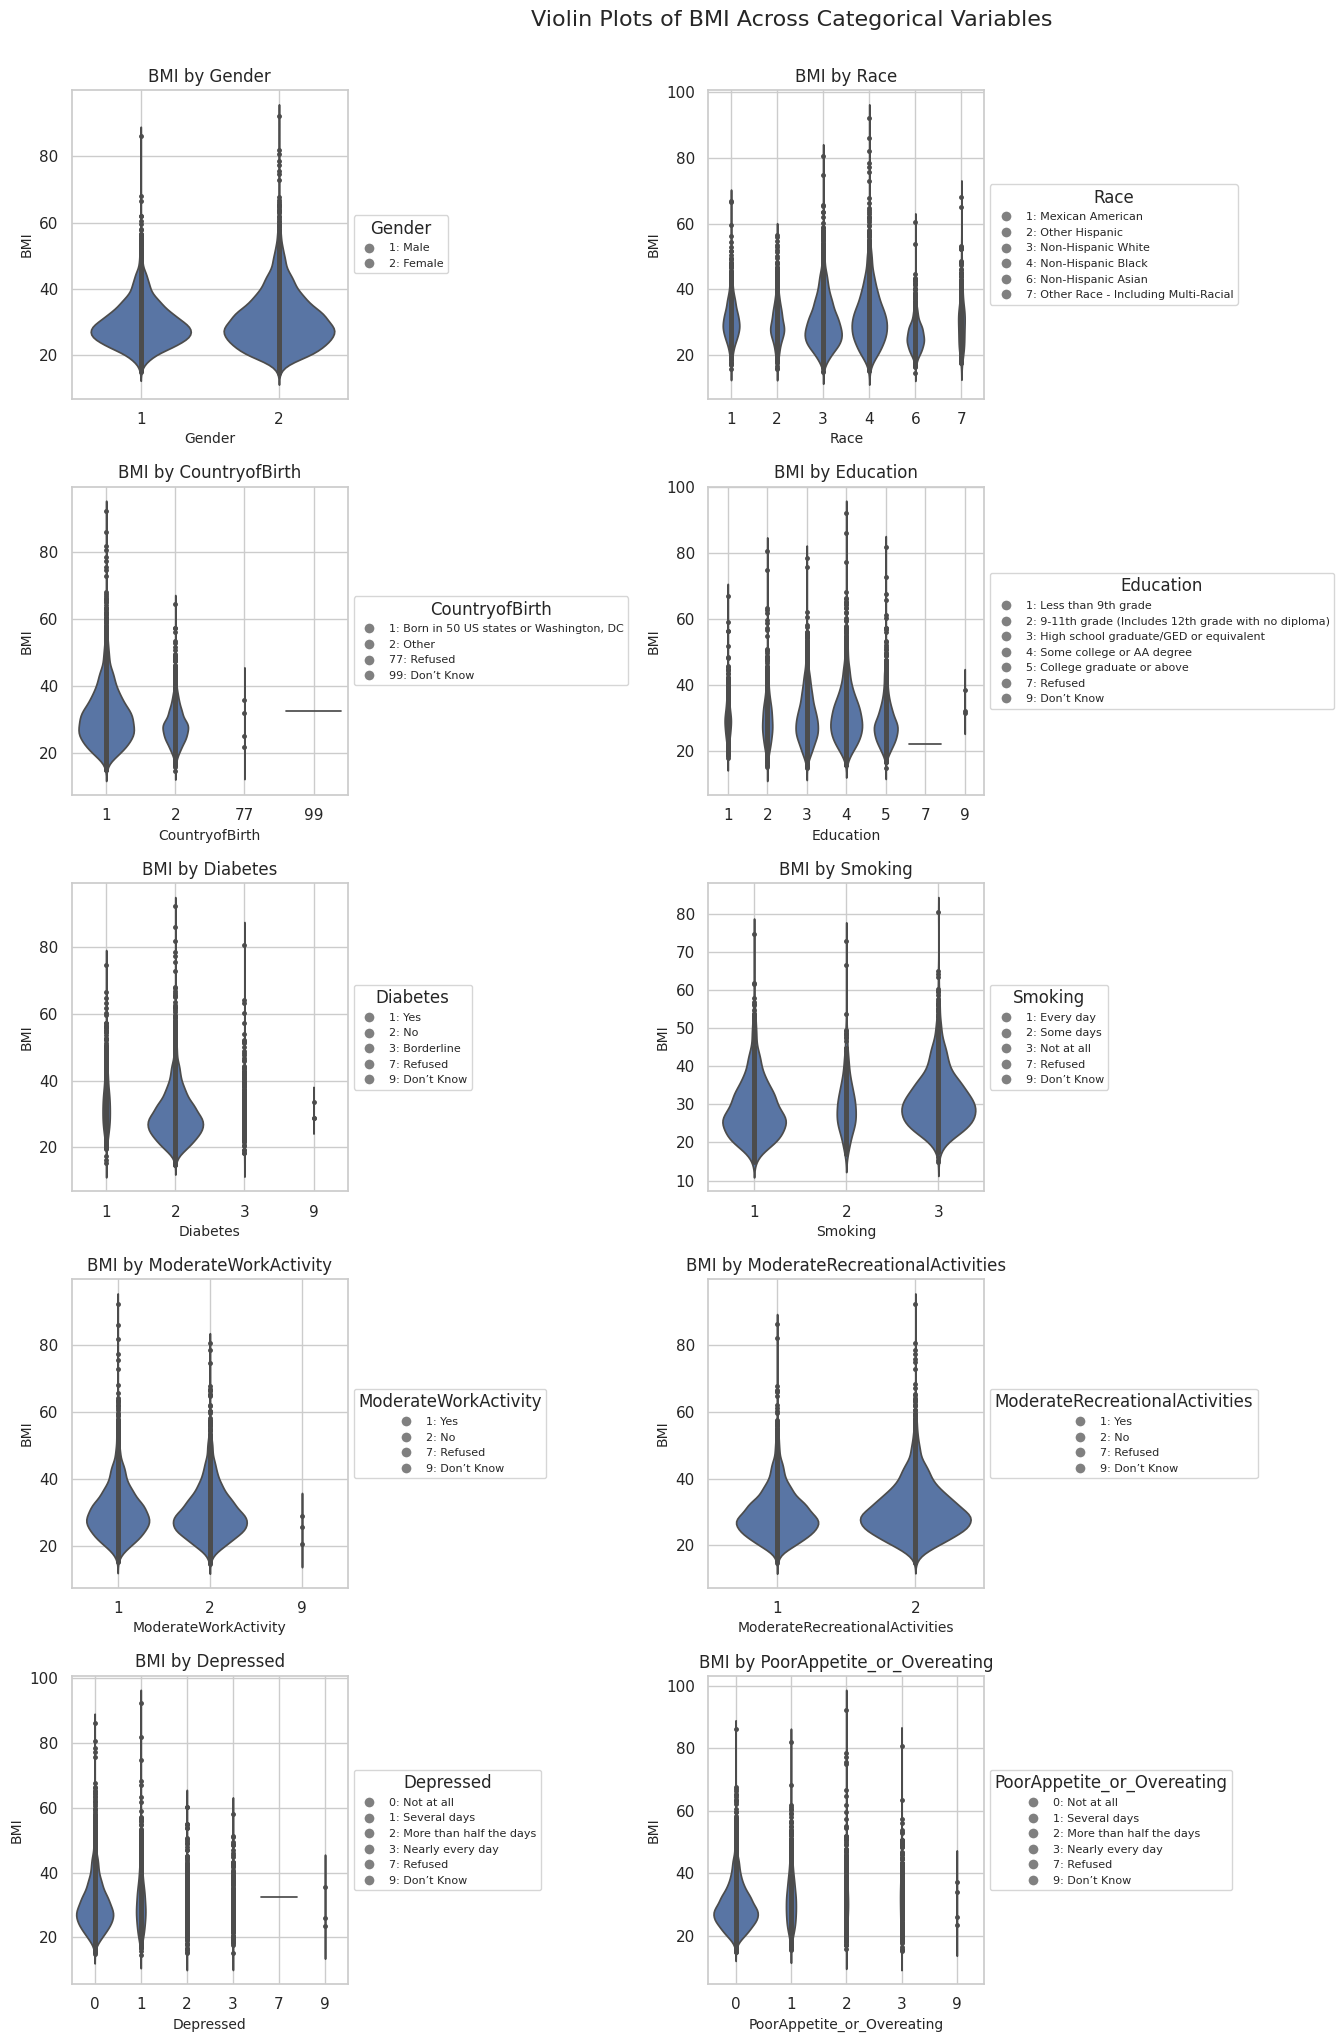

In [1064]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical variables and their descriptions
categorical_vars = {
    'Gender': {1: 'Male', 2: 'Female'},
    'Race': {
        1: 'Mexican American',
        2: 'Other Hispanic',
        3: 'Non-Hispanic White',
        4: 'Non-Hispanic Black',
        6: 'Non-Hispanic Asian',
        7: 'Other Race - Including Multi-Racial'
    },
    'CountryofBirth': {
        1: 'Born in 50 US states or Washington, DC',
        2: 'Other',
        77: 'Refused',
        99: 'Don’t Know'
    },
    'Education': {
        1: 'Less than 9th grade',
        2: '9-11th grade (Includes 12th grade with no diploma)',
        3: 'High school graduate/GED or equivalent',
        4: 'Some college or AA degree',
        5: 'College graduate or above',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Diabetes': {
        1: 'Yes',
        2: 'No',
        3: 'Borderline',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Smoking': {
        1: 'Every day',
        2: 'Some days',
        3: 'Not at all',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateWorkActivity': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'ModerateRecreationalActivities': {
        1: 'Yes',
        2: 'No',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'Depressed': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    },
    'PoorAppetite_or_Overeating': {
        0: 'Not at all',
        1: 'Several days',
        2: 'More than half the days',
        3: 'Nearly every day',
        7: 'Refused',
        9: 'Don’t Know'
    }
}

# Set up the plotting area
n_cols = 2
n_rows = (len(categorical_vars) + 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 20))
axes = axes.flatten()

# Generate violin plots with smaller data points size
for i, (var, legend_info) in enumerate(categorical_vars.items()):
    sns.violinplot(data=df_tidy, x=var, y='BMI', ax=axes[i], inner="point", scale="count")  # Inner="point" displays points
    axes[i].set_title(f'BMI by {var}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel('BMI', fontsize=10)
    axes[i].grid(True)

    # Add a legend outside the plot with category names as legend titles
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'{k}: {v}', markersize=8, markerfacecolor='grey')
               for k, v in legend_info.items()]
    axes[i].legend(handles=handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8, title=var)

# Adjust layout to fit legends
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space for legends on the right
plt.suptitle('Violin Plots of BMI Across Categorical Variables', fontsize=16, y=1.02)
plt.show()


## Multivariate Analysis

Correlation Heatmap

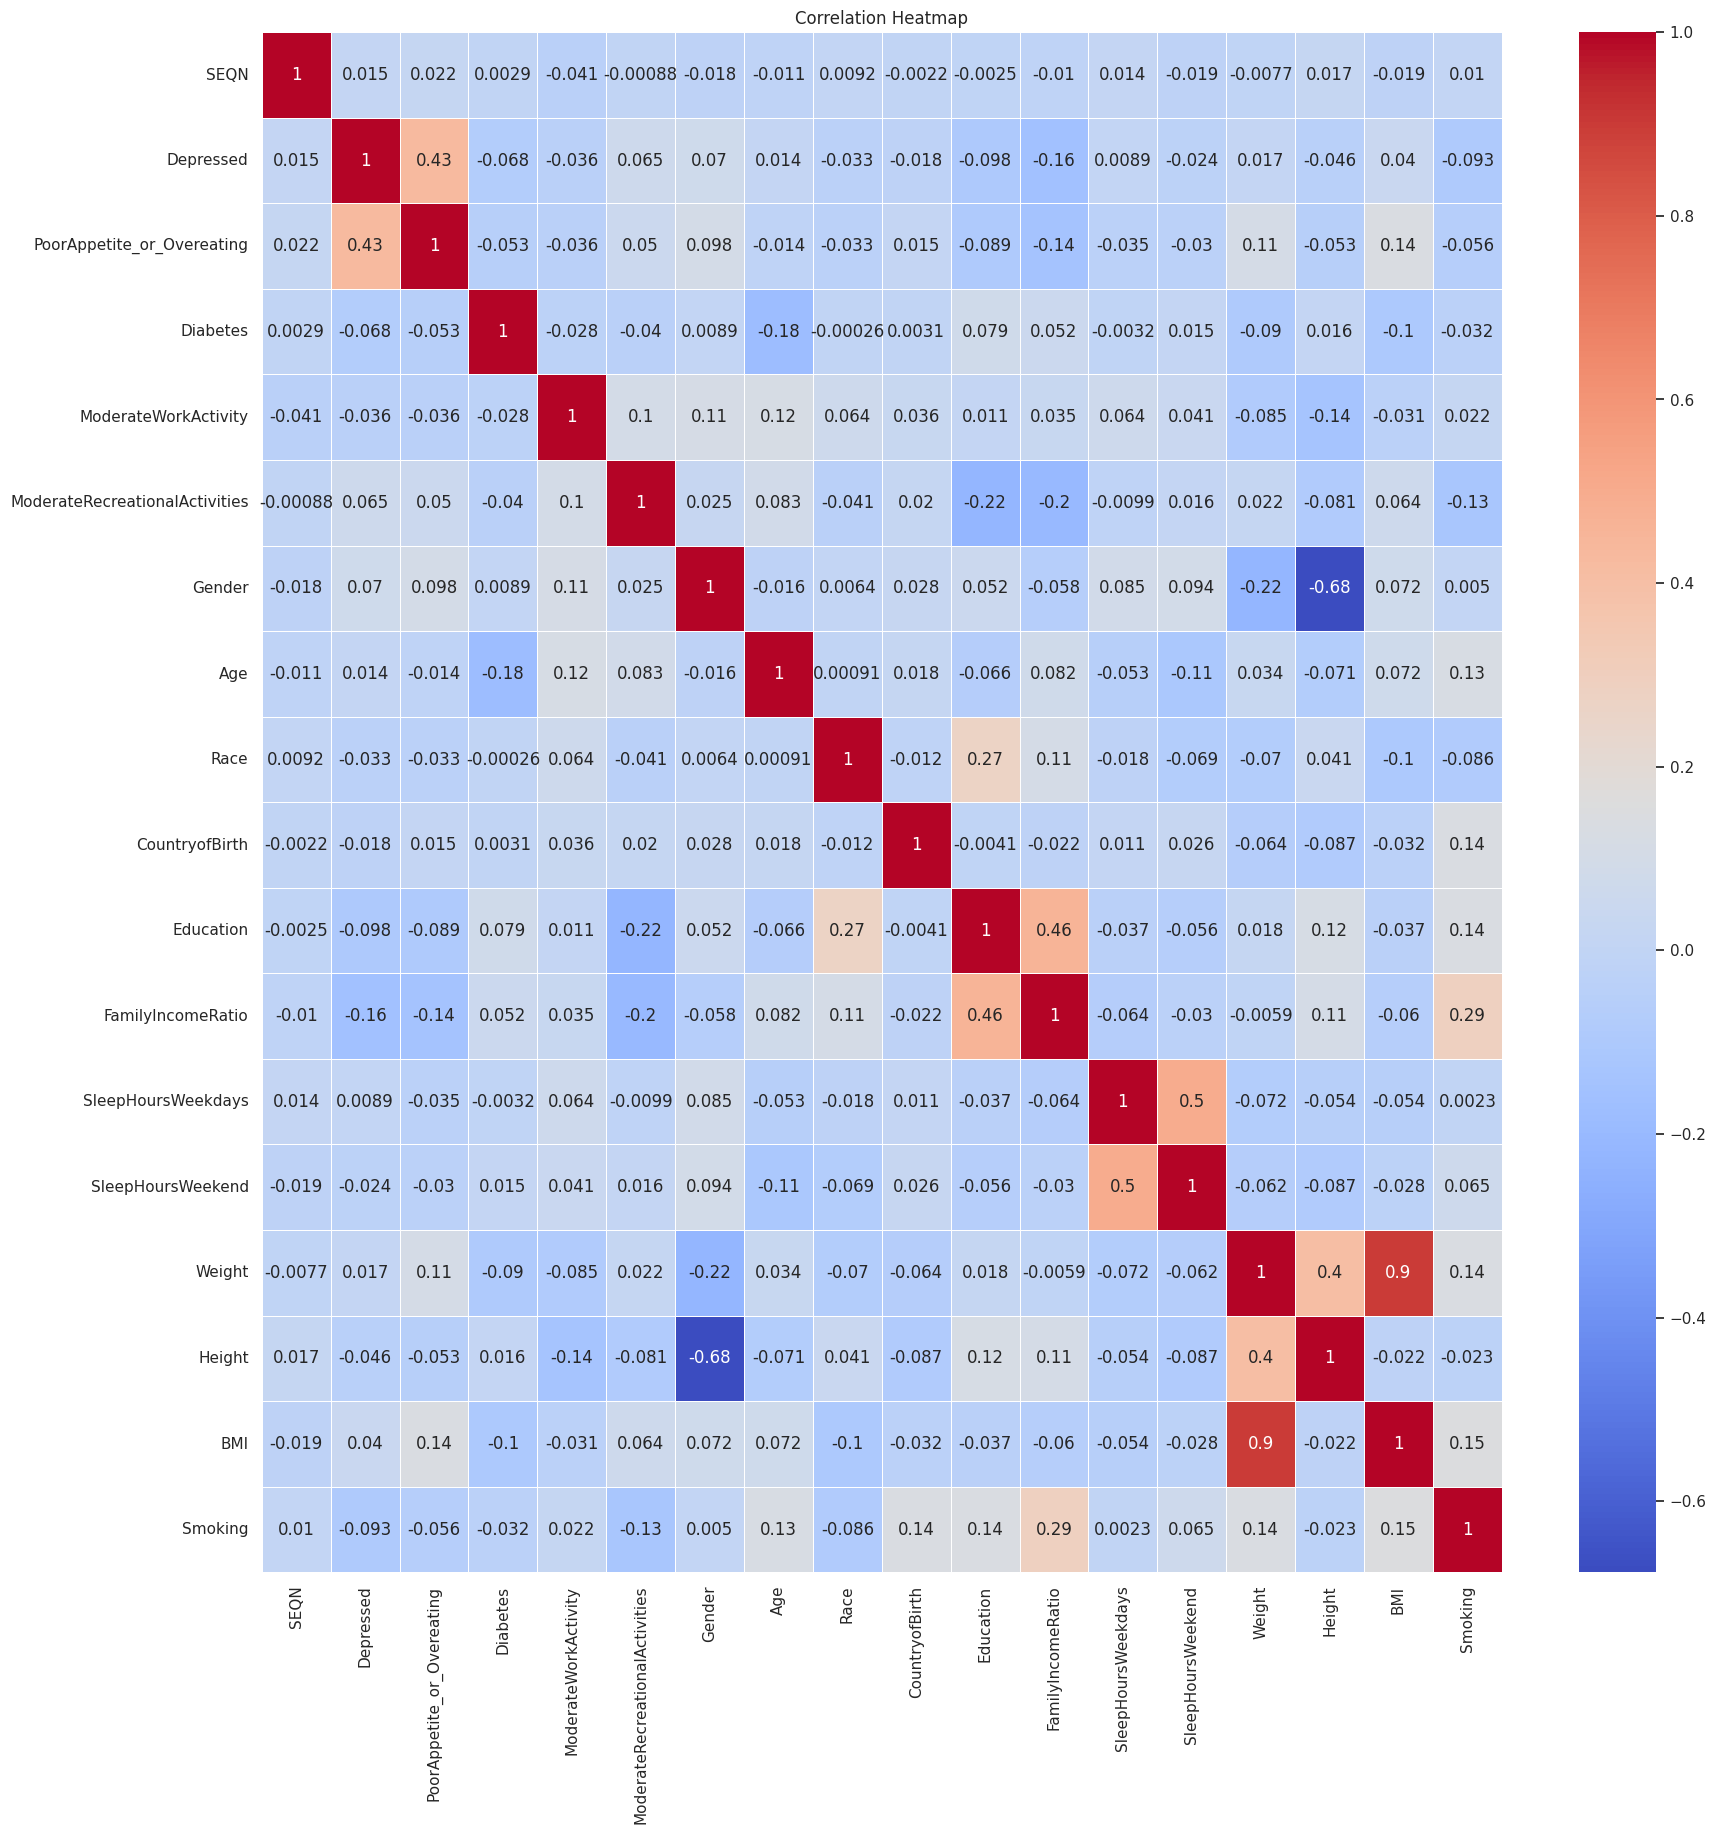

In [1065]:
corr_matrix = df_tidy.corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# **BMI Categories**

According to CDC, BMI is a calculation of a body person's weight (in kilograms) divided by the square of their height (in meters). For adults 20 and older, BMI categories are based on a person's BMI regardless of age, sex, or race.


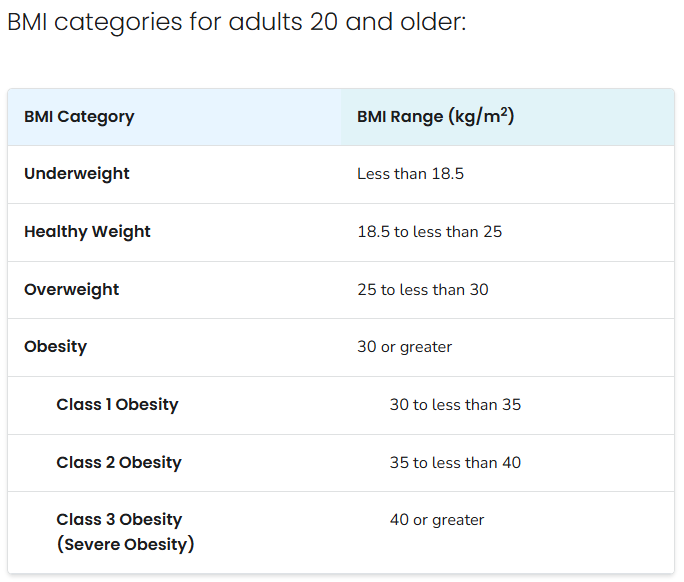

Creating a new column to categorize each respondent's weight

In [1066]:
obese_condition = [
    (df_tidy['BMI'] < 18.5),  # Underweight
    (df_tidy['BMI'] >= 18.5) & (df_tidy['BMI'] < 25.0),  # Healthy
    (df_tidy['BMI'] >= 25.0) & (df_tidy['BMI'] < 30.0),  # Overweight
    (df_tidy['BMI'] >= 30.0)  # Obese
]
obese_value = [1, 2, 3, 4]  # 1: Underweight, 2: Healthy, 3: Overweight, 4: Obese
df_tidy['Obesity'] = np.select(obese_condition, obese_value, default = np.nan).astype(int)

In [1067]:
df_tidy

,SEQN,Depressed,PoorAppetite_or_Overeating,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Gender,Age,Race,CountryofBirth,Education,FamilyIncomeRatio,SleepHoursWeekdays,SleepHoursWeekend,Weight,Height,BMI,Smoking,Obesity
3,109266,0,0,2,2,1,2,29,6,2,5,5.00,7.5,8.0,97.1,160.2,37.8,<NA>,4
8,109271,1,0,2,1,2,1,49,3,1,2,NaN,10.0,13.0,98.8,182.3,29.7,1,3
10,109273,2,2,2,2,1,1,36,3,1,4,0.83,6.5,8.0,74.3,184.2,21.9,1,2
21,109284,0,0,2,2,2,2,44,1,2,2,NaN,8.0,10.0,91.1,152.7,39.1,<NA>,4
23,109286,<NA>,<NA>,2,2,2,2,33,6,2,5,1.36,8.5,9.0,72.6,158.4,28.9,<NA>,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15550,124813,0,0,2,2,2,2,43,4,2,5,NaN,8.0,10.0,78.6,168.5,27.7,<NA>,3
15551,124814,0,0,2,2,2,1,64,4,1,3,2.00,8.0,7.0,114.3,174.5,37.5,3,4
15552,124815,0,0,2,2,1,1,52,4,1,4,5.00,6.0,6.0,94.3,178.8,29.5,3,3
15555,124818,0,0,2,2,2,1,40,4,1,5,3.82,6.0,7.0,108.8,168.7,38.2,<NA>,4


# Taking Care of Missing Data

In [1068]:
missing_values = df_tidy.isnull().sum()
missing_percentage = (df_tidy.isnull().sum() / len(df_tidy)) * 100
missing = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing)

                                Missing Values  Percentage
SEQN                                         0    0.000000
Depressed                                  392    6.102117
PoorAppetite_or_Overeating                 393    6.117684
Diabetes                                     0    0.000000
ModerateWorkActivity                         0    0.000000
ModerateRecreationalActivities               0    0.000000
Gender                                       0    0.000000
Age                                          0    0.000000
Race                                         0    0.000000
CountryofBirth                               0    0.000000
Education                                    0    0.000000
FamilyIncomeRatio                          881   13.714197
SleepHoursWeekdays                          45    0.700498
SleepHoursWeekend                           56    0.871731
Weight                                       0    0.000000
Height                                       0    0.0000

We can see that almost 61% of data is missing in the 'Smoking' column and thus, we will drop this column.

We will fill in the missing values of 'FamilyIncomeRatio', 'SleepHoursWeekdays', 'SleepHoursWeekend' with their mean values.

Additionally, we will fill in the missing values of 'Depressed' and 'PoorAppetite_or_Overeating' with their mode.

In [1069]:
df_tidy = df_tidy.drop(columns=['Smoking'])
continuous_columns = ['FamilyIncomeRatio', 'SleepHoursWeekdays', 'SleepHoursWeekend']
for col in continuous_columns:
    df_tidy[col] = df_tidy[col].fillna(df_tidy[col].mean())
categorical_columns = ['Depressed', 'PoorAppetite_or_Overeating']
for col in categorical_columns:
    df_tidy[col] = df_tidy[col].fillna(df_tidy[col].mode()[0])
print(df_tidy.isnull().sum())

SEQN                              0
Depressed                         0
PoorAppetite_or_Overeating        0
Diabetes                          0
ModerateWorkActivity              0
ModerateRecreationalActivities    0
Gender                            0
Age                               0
Race                              0
CountryofBirth                    0
Education                         0
FamilyIncomeRatio                 0
SleepHoursWeekdays                0
SleepHoursWeekend                 0
Weight                            0
Height                            0
BMI                               0
Obesity                           0
dtype: int64


Now, we have no null values in our dataset.

# Checking for Correlation

In [1070]:
df_tidy.corr()

,SEQN,Depressed,PoorAppetite_or_Overeating,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Gender,Age,Race,CountryofBirth,Education,FamilyIncomeRatio,SleepHoursWeekdays,SleepHoursWeekend,Weight,Height,BMI,Obesity
SEQN,1.000000,0.017381,0.024632,0.002913,-0.040760,-0.000883,-0.017620,-0.010679,0.009223,-0.002171,-0.002539,-0.009438,0.014216,-0.018799,-0.007684,0.017232,-0.018717,-0.005394
Depressed,0.017381,1.000000,0.433379,-0.065378,-0.039859,0.060998,0.062371,0.015204,-0.039024,-0.019346,-0.083395,-0.133647,0.002770,-0.025982,0.023439,-0.033577,0.041800,0.042252
PoorAppetite_or_Overeating,0.024632,0.433379,1.000000,-0.050270,-0.040125,0.046422,0.088247,-0.012242,-0.039135,0.013451,-0.075524,-0.118183,-0.038210,-0.031701,0.108109,-0.040325,0.138745,0.106238
Diabetes,0.002913,-0.065378,-0.050270,1.000000,-0.028455,-0.040383,0.008922,-0.183192,-0.000265,0.003082,0.078771,0.045987,-0.003167,0.015045,-0.090035,0.016239,-0.103333,-0.109044
ModerateWorkActivity,-0.040760,-0.039859,-0.040125,-0.028455,1.000000,0.101616,0.113360,0.118611,0.063795,0.036037,0.011144,0.031962,0.064212,0.041138,-0.084583,-0.136069,-0.030671,-0.032874
ModerateRecreationalActivities,-0.000883,0.060998,0.046422,-0.040383,0.101616,1.000000,0.024916,0.083345,-0.040903,0.019515,-0.222218,-0.187359,-0.009851,0.015699,0.022485,-0.081354,0.063784,0.049930
Gender,-0.017620,0.062371,0.088247,0.008922,0.113360,0.024916,1.000000,-0.015593,0.006370,0.027822,0.051533,-0.053885,0.085106,0.093185,-0.222255,-0.677261,0.072059,0.019326
Age,-0.010679,0.015204,-0.012242,-0.183192,0.118611,0.083345,-0.015593,1.000000,0.000906,0.017519,-0.066187,0.075682,-0.052658,-0.112283,0.033753,-0.071243,0.071575,0.103666
Race,0.009223,-0.039024,-0.039135,-0.000265,0.063795,-0.040903,0.006370,0.000906,1.000000,-0.012409,0.269091,0.099487,-0.017729,-0.068414,-0.069538,0.040624,-0.101211,-0.140916
CountryofBirth,-0.002171,-0.019346,0.013451,0.003082,0.036037,0.019515,0.027822,0.017519,-0.012409,1.000000,-0.004056,-0.013320,0.010932,0.025894,-0.063553,-0.087024,-0.031716,-0.011858


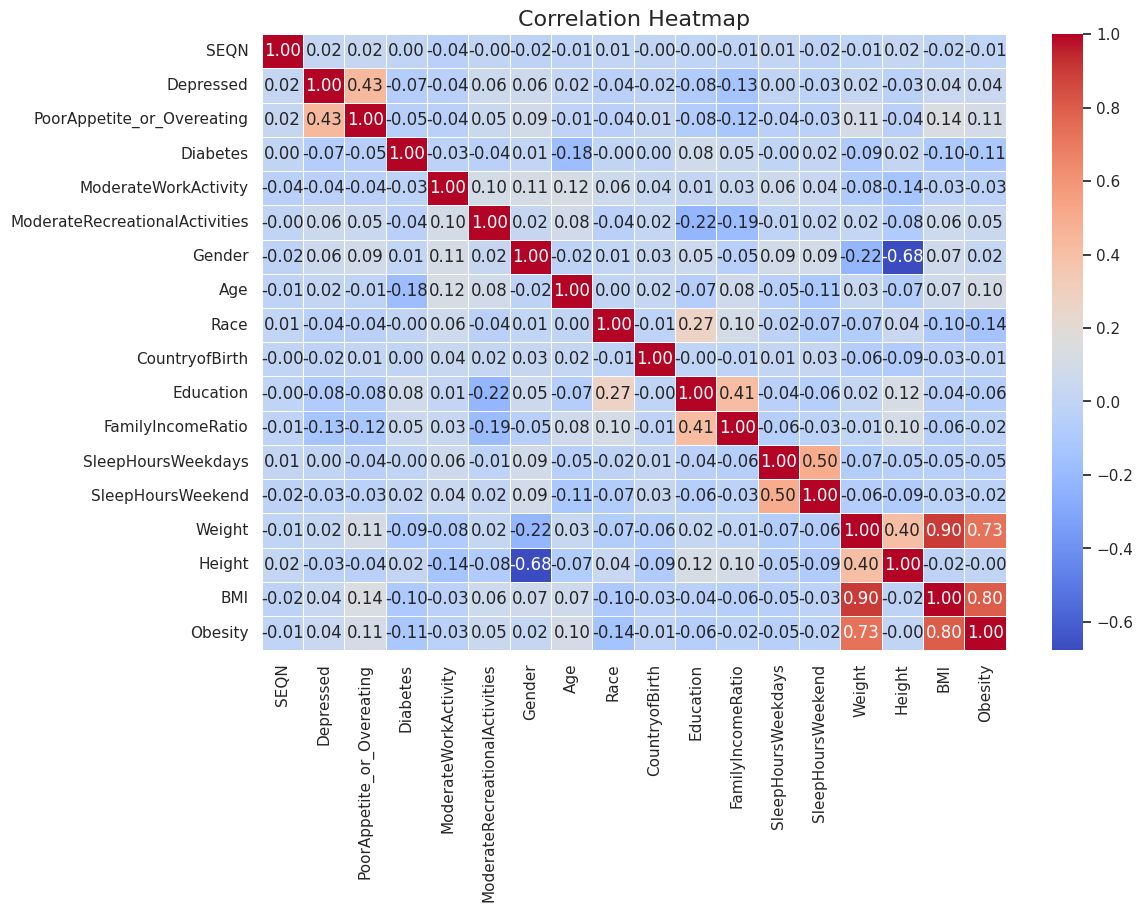

In [1071]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_tidy.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

We can clearly see that Obesity is highly correlated to Weight (0.73) and BMI (0.80).

We decided to drop Weight and BMI in order to use other factors to train the model because BMI is based on weight and other factors, and Obesity level is defined based on BMI.

In [1072]:
df_tidy.drop(columns=['Weight', 'BMI'], inplace=True)

# Handling Imbalance in the Data

<ipython-input-1073-e3b4e113d93c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Obesity', data=df_tidy, ax=axes[0], palette='pastel')


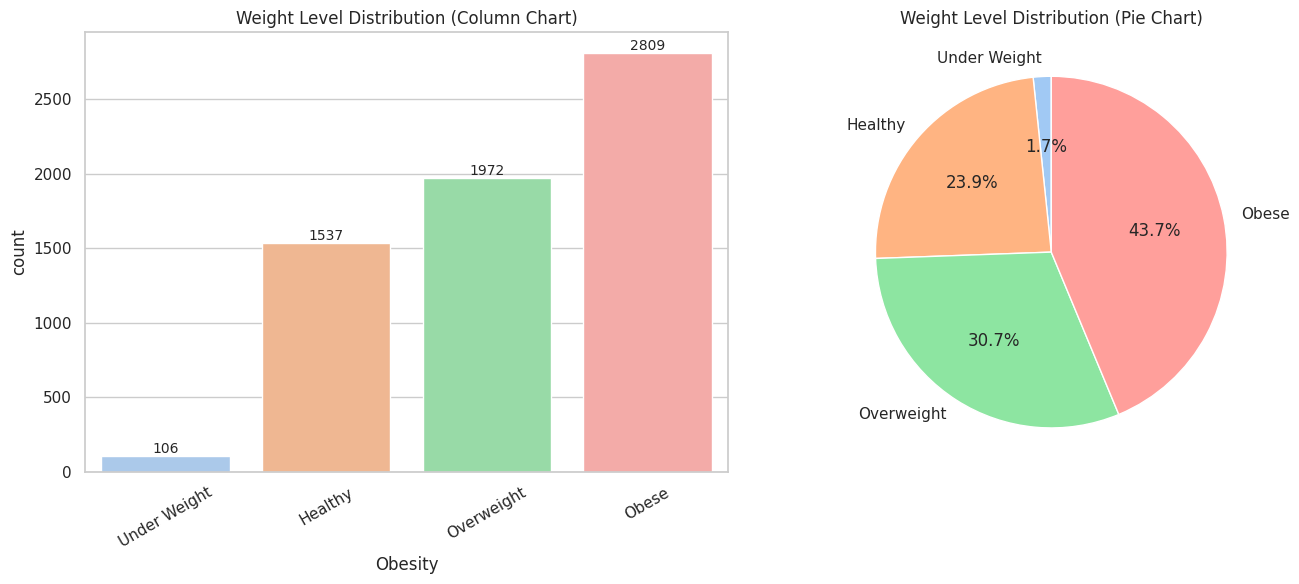

In [1073]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(x='Obesity', data=df_tidy, ax=axes[0], palette='pastel')
axes[0].set_title('Weight Level Distribution (Column Chart)')
positions = (0, 1, 2, 3)
labels = ["Under Weight", "Healthy", "Overweight", "Obese"]
axes[0].set_xticks(positions)
axes[0].set_xticklabels(labels, rotation=30)
for bar in axes[0].patches:
    count = int(bar.get_height())
    axes[0].annotate(f'{count}',
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)
obesity_counts = df_tidy['Obesity'].value_counts().sort_index()
obesity_labels = ["Under Weight", "Healthy", "Overweight", "Obese"]
axes[1].pie(obesity_counts, labels=obesity_labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Weight Level Distribution (Pie Chart)')
plt.tight_layout()
plt.show()

From the weight level distribution plot, it is evident that the data is imbalanced, with the majority of respondents categorized as either overweight or obese.

The pie chart further illustrates this, showing that 43.7% of respondents (aged 20–65 years) fall into the "Obese" category, while 30.7% are categorized as "Overweight."

To address this imbalance, we decided to group respondents in the "Underweight," "Healthy," and "Overweight" categories together as "Not Obese," while retaining the "Obese" group as a separate category.

In [1074]:
df_tidy['Weight_category'] = df_tidy['Obesity'].apply(lambda x: 1 if x == 4 else 0)
# Verify the result
print(df_tidy['Weight_category'].value_counts())

Weight_category
0    3615
1    2809
Name: count, dtype: int64


In [1075]:
df_tidy.drop(columns=['Obesity'], inplace=True)
df_tidy.head()

,SEQN,Depressed,PoorAppetite_or_Overeating,Diabetes,ModerateWorkActivity,ModerateRecreationalActivities,Gender,Age,Race,CountryofBirth,Education,FamilyIncomeRatio,SleepHoursWeekdays,SleepHoursWeekend,Height,Weight_category
3,109266,0,0,2,2,1,2,29,6,2,5,5.000000,7.5,8.0,160.2,1
8,109271,1,0,2,1,2,1,49,3,1,2,2.577115,10.0,13.0,182.3,0
10,109273,2,2,2,2,1,1,36,3,1,4,0.830000,6.5,8.0,184.2,0
21,109284,0,0,2,2,2,2,44,1,2,2,2.577115,8.0,10.0,152.7,1
23,109286,0,0,2,2,2,2,33,6,2,5,1.360000,8.5,9.0,158.4,0


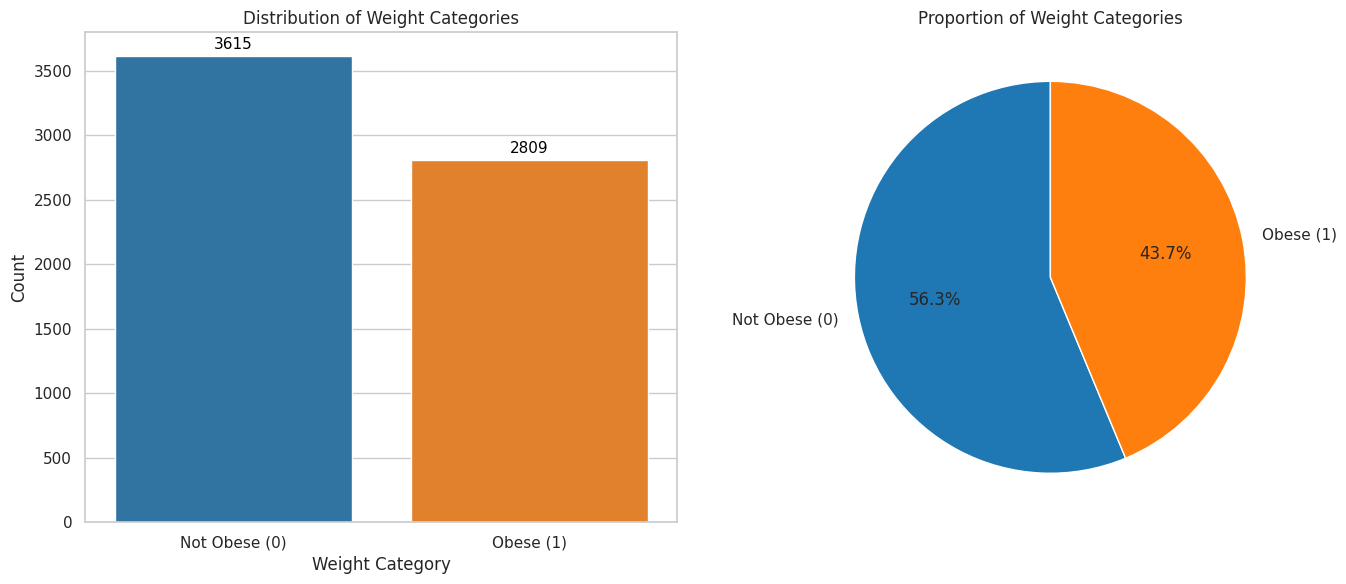

In [1076]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define labels and color scheme
labels = ['Not Obese (0)', 'Obese (1)']
colors = ['#1f77b4', '#ff7f0e']

# Column chart with improved palette handling
sns.countplot(data=df_tidy, x='Weight_category', hue='Weight_category', ax=axes[0], palette=colors, dodge=False, legend=False)
axes[0].set_title('Distribution of Weight Categories')
axes[0].set_xlabel('Weight Category')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(labels)

# Add value counts on the column chart
for p in axes[0].patches:
    axes[0].annotate(f"{int(p.get_height())}",
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

# Pie chart
weight_category_counts = df_tidy['Weight_category'].value_counts()
axes[1].pie(weight_category_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Proportion of Weight Categories')

# Adjust layout
plt.tight_layout()
plt.show()

The updated distribution shows that the data is now more balanced, ensuring better representation across categories.

# Creating the Independent Variable Matrix and Dependent Variable Vector

In [1077]:
X= df_tidy.iloc[:, 1:-1].values #Excluding the "SEQN" column
y= df_tidy.iloc[:, -1].values

In [1078]:
print(X)

[[0 0 2 ... 7.5 8.0 160.2]
 [1 0 2 ... 10.0 13.0 182.3]
 [2 2 2 ... 6.5 8.0 184.2]
 ...
 [0 0 2 ... 6.0 6.0 178.8]
 [0 0 2 ... 6.0 7.0 168.7]
 [0 0 3 ... 8.0 9.0 176.4]]


# Encoding Categorical Data

In [1079]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first'), [0,2,3,4,6,7,8,12,13])], remainder='passthrough')
X = ct.fit_transform(X).toarray()

# Splitting the Data into Training Set and Test Set

In [1083]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

#Feature Scaling

In [1084]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Training

With the preprocessed dataset, we proceed to select machine learning models for classification. We train various models (e.g., logistic regression, decision trees, random forests, etc), and evaluate their performance using metrics like accuracy, precision, recall, and F1-score.

## Logistic Regression

In [1085]:
from sklearn.linear_model import LogisticRegression
classifier_logistic=LogisticRegression()
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

Predicting Test Set Results

In [1086]:
y_test_pred_lr=classifier_logistic.predict(X_test)

Confusion Matrix

In [1087]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm=confusion_matrix(y_test,y_test_pred_lr)
print(cm)

[[490 239]
 [269 287]]


Model Performance Metrics

In [1088]:
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66       729
           1       0.55      0.52      0.53       556

    accuracy                           0.60      1285
   macro avg       0.60      0.59      0.59      1285
weighted avg       0.60      0.60      0.60      1285



## Decision Tree Classification

In [1089]:
from sklearn.tree import DecisionTreeClassifier
classifier_decisiontree=DecisionTreeClassifier(criterion="entropy")
classifier_decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Predicting Test Set Results

In [1090]:
y_test_pred_dt=classifier_decisiontree.predict(X_test)

Confusion Matrix

In [1091]:
cm=confusion_matrix(y_test,y_test_pred_dt)
print(cm)

[[470 259]
 [285 271]]


Model Performance Metrics

In [1092]:
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       729
           1       0.51      0.49      0.50       556

    accuracy                           0.58      1285
   macro avg       0.57      0.57      0.57      1285
weighted avg       0.57      0.58      0.58      1285



## Random Forest Classification

In [1093]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

Predicting Test Set Results

In [1094]:
y_test_pred_rf=classifier_rf.predict(X_test)

Confusion Matrix

In [1095]:
cm=confusion_matrix(y_test,y_test_pred_rf)
print(cm)

[[536 193]
 [300 256]]


Model Performance Metrics

In [1096]:
print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.64      0.74      0.68       729
           1       0.57      0.46      0.51       556

    accuracy                           0.62      1285
   macro avg       0.61      0.60      0.60      1285
weighted avg       0.61      0.62      0.61      1285



## K-Nearest Neighbor (K-NN) Algorithm

In [1097]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

Predicting Test Set Results

In [1098]:
y_test_pred_knn=classifier_knn.predict(X_test)

Confusion Matrix

In [1099]:
cm=confusion_matrix(y_test,y_test_pred_knn)
print(cm)

[[456 273]
 [323 233]]


Model Performance Metrics

In [1100]:
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.59      0.63      0.60       729
           1       0.46      0.42      0.44       556

    accuracy                           0.54      1285
   macro avg       0.52      0.52      0.52      1285
weighted avg       0.53      0.54      0.53      1285



## Naive Bayes Classification

In [1101]:
from sklearn.naive_bayes import GaussianNB
classifier_nb= GaussianNB()
classifier_nb.fit(X_train,y_train)

GaussianNB()

Predicting Test Set Results

In [1102]:
y_test_pred_nb = classifier_nb.predict(X_test)

Confusion Matrix

In [1103]:
cm=confusion_matrix(y_test, y_test_pred_nb)
print(cm)

[[ 80 649]
 [ 65 491]]


Model Performance Metrics

In [1104]:
print(classification_report(y_test, y_test_pred_nb))

              precision    recall  f1-score   support

           0       0.55      0.11      0.18       729
           1       0.43      0.88      0.58       556

    accuracy                           0.44      1285
   macro avg       0.49      0.50      0.38      1285
weighted avg       0.50      0.44      0.35      1285



## Support Vector Machine (SVM) Algorithm

In [1105]:
from sklearn.svm import SVC
classifier_svm=SVC(kernel='rbf', probability=True)
classifier_svm.fit(X_train,y_train)

SVC(probability=True)

Predicting Test Set Results

In [1106]:
y_test_pred_svm=classifier_svm.predict(X_test)

Confusion Matrix

In [1107]:
cm = confusion_matrix(y_test, y_test_pred_svm)
print(cm)

[[538 191]
 [348 208]]


Model Performance Metrics

In [1108]:
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67       729
           1       0.52      0.37      0.44       556

    accuracy                           0.58      1285
   macro avg       0.56      0.56      0.55      1285
weighted avg       0.57      0.58      0.57      1285



In [1109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define models and predictions
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-NN', 'Naive Bayes', 'SVM']
y_test_preds = [y_test_pred_lr, y_test_pred_dt, y_test_pred_rf, y_test_pred_knn, y_test_pred_nb, y_test_pred_svm]

# Initialize empty lists to store metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Calculate metrics for each model
for y_pred in y_test_preds:
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))

# Create a DataFrame for comparison
metrics_table = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores
})

# Display the table
metrics_table

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.604669,0.595607,0.594170,0.594551
1,Decision Tree,0.576654,0.566919,0.566064,0.566251
2,Random Forest,0.616342,0.605652,0.597843,0.597218
3,K-NN,0.536187,0.522920,0.522290,0.521785
4,Naive Bayes,0.444358,0.491213,0.496416,0.381038
5,SVM,0.580545,0.564263,0.556049,0.550928


#Precision-Recall Curves

Precision-Recall Curves is used to evaluate the performance of binary classification algorithms. Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

In [1110]:
probs_lr = classifier_logistic.predict_proba(X_test)[:, 1]
probs_dt = classifier_decisiontree.predict_proba(X_test)[:, 1]
probs_rf = classifier_rf.predict_proba(X_test)[:, 1]
probs_knn= classifier_knn.predict_proba(X_test)[:, 1]
probs_nb = classifier_nb.predict_proba(X_test)[:, 1]
probs_svm = classifier_svm.predict_proba(X_test)[:, 1]

In [1111]:
from sklearn.metrics import auc, precision_recall_curve

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _  = precision_recall_curve(y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_knn, recall_knn, _ = precision_recall_curve(y_test, probs_knn)
auc_knn = auc(recall_knn, precision_knn)

precision_nb, recall_nb, _ = precision_recall_curve(y_test, probs_nb)
auc_nb = auc(recall_nb, precision_nb)

precision_svm, recall_svm, _ = precision_recall_curve(y_test, probs_svm)
auc_svm = auc(recall_svm, precision_svm)

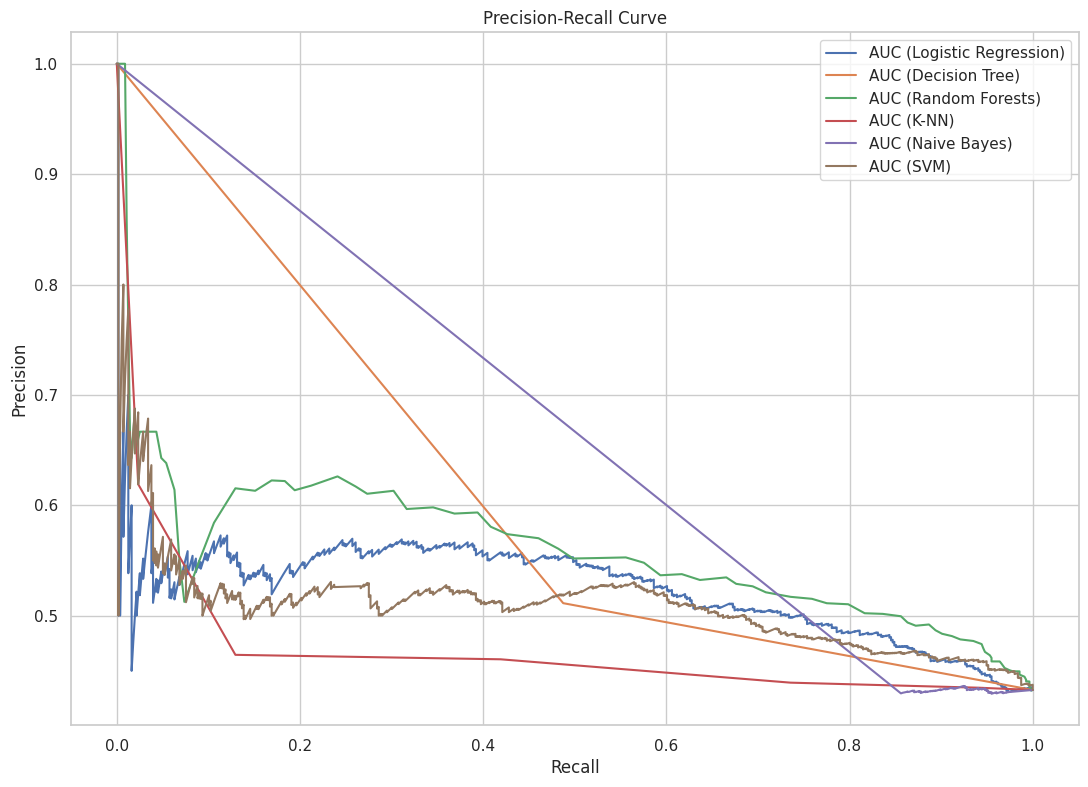

In [1112]:
plt.figure(figsize=(13, 9))

plt.plot(recall_lr, precision_lr, label='AUC (Logistic Regression)')
plt.plot(recall_dt, precision_dt, label='AUC (Decision Tree)')
plt.plot(recall_rf, precision_rf, label='AUC (Random Forests)')
plt.plot(recall_knn, precision_knn, label='AUC (K-NN)')
plt.plot(recall_nb, precision_nb, label='AUC (Naive Bayes)')
plt.plot(recall_svm, precision_svm, label='AUC (SVM)')

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [1118]:
print(f'AUC of Logistic Regression: {auc_lr:.2f}')
print(f'AUC of Random Forest: {auc_nb:.2f}')
print(f'AUC of Decision Tree: {auc_dt:.2f}')
print(f'AUC of K-NN: {auc_knn:.2f}')
print(f'AUC of Naive Bayes: {auc_rf:.2f}')
print(f'AUC of SVM: {auc_svm:.2f}')

AUC of Logistic Regression: 0.52
AUC of Random Forest: 0.67
AUC of Decision Tree: 0.61
AUC of K-NN: 0.47
AUC of Naive Bayes: 0.56
AUC of SVM: 0.51


From the Precision-Recall Curves, we can see that the Random Forest Model has the highest AUC values, whcih is 0.67. Same as the accuracy results, Random Forest Model have the best fit compared to other models.